<a href="https://colab.research.google.com/github/PranavH2003/EDA_Theory_DA/blob/main/EDA_21BDS0155_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

!git clone https://github.com/PranavH2003/EDA_Theory_DA.git

Cloning into 'EDA_Theory_DA'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 48.74 KiB | 1.25 MiB/s, done.


In [76]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Load dataset
file_path = '/content/EDA_Theory_DA/Employee Attrition.csv'
data = pd.read_csv(file_path)

In [78]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [79]:
# 1. Dataset Exploration
# 1.1. Dimension of the Dataset
print("Dataset Dimensions (Rows, Columns):", data.shape)

Dataset Dimensions (Rows, Columns): (1470, 35)


In [80]:
# 1.2. Summary of the Dataset
print("\nSummary of Dataset:\n", data.describe(include='all'))


Summary of Dataset:
                 Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top  

In [81]:
# 1.3. Data Information
print("\nInformation about Dataset:\n")
data.info()



Information about Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 


In [82]:
# 1.4. Checking for Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values in Dataset:\n", missing_values)


Missing Values in Dataset:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurr

# Module 2 - Data Transformation

In [83]:
# 3. Data Cleaning
# 3.1. Removing Duplicate Rows
data = data.drop_duplicates()
print("\nDataset Dimensions after Removing Duplicates (Rows, Columns):", data.shape)


Dataset Dimensions after Removing Duplicates (Rows, Columns): (1470, 35)


In [84]:
# 3.2. Removing Unnecessary Columns
# Removing columns that are not useful for analysis, such as 'EmployeeNumber', which is just an identifier
data = data.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])

In [86]:
# Retain non-binary categorical columns without encoding for analysis purposes
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

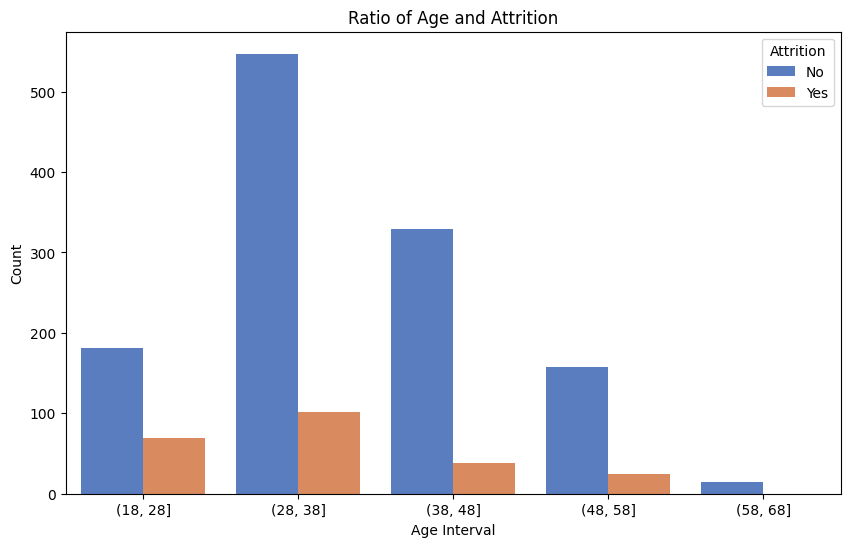

In [130]:
# Interval-based age analysis (Discretization)
interval = pd.interval_range(start=18, freq=10, end=68)
data['Age_Interval'] = pd.cut(data['Age'], bins=interval)
age_data = data.groupby(['Attrition'])[['Age_Interval']].value_counts().reset_index(name='Count')

# Plotting attrition by age intervals
plt.figure(figsize=(10, 6))
sns.barplot(data=age_data, x='Age_Interval', y='Count', hue="Attrition", palette='muted')
plt.title("Ratio of Age and Attrition")
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.show()


In [87]:
# 5. Feature Scaling
scaler = StandardScaler()

# Scaling numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [88]:
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Module 3 - Correlation Analysis and Time Series Analysis



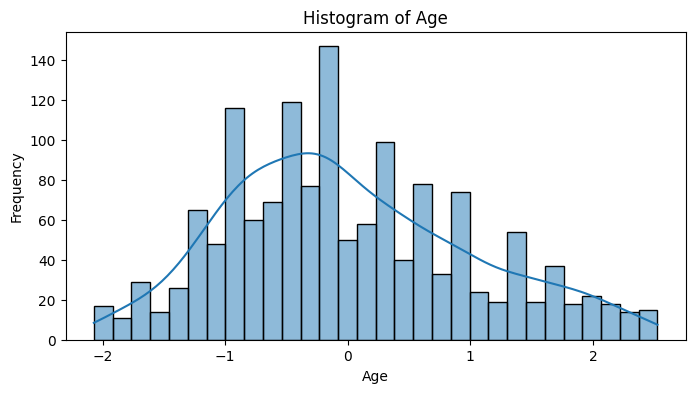

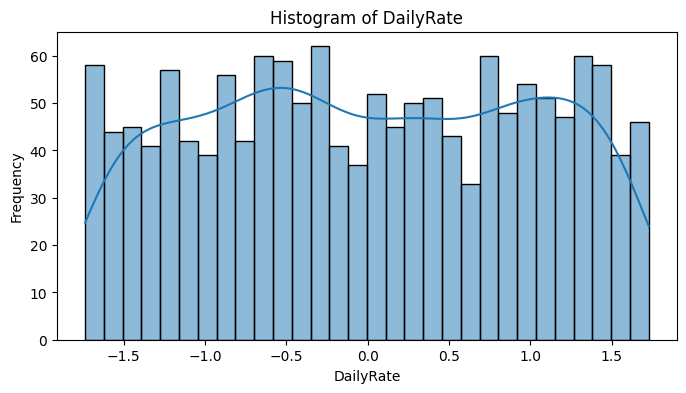

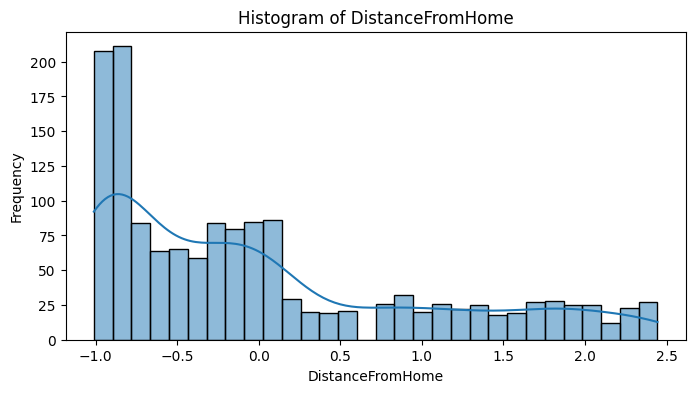

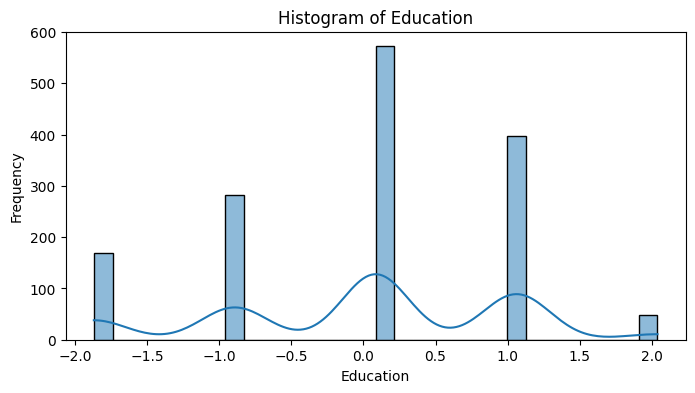

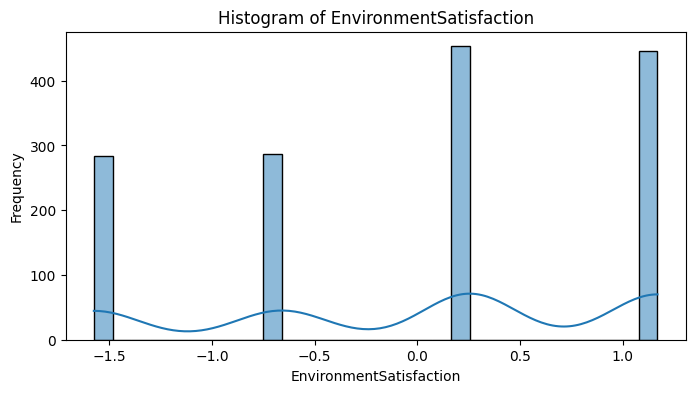

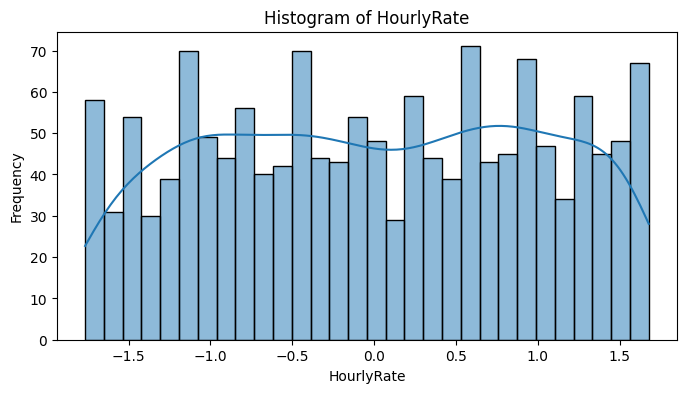

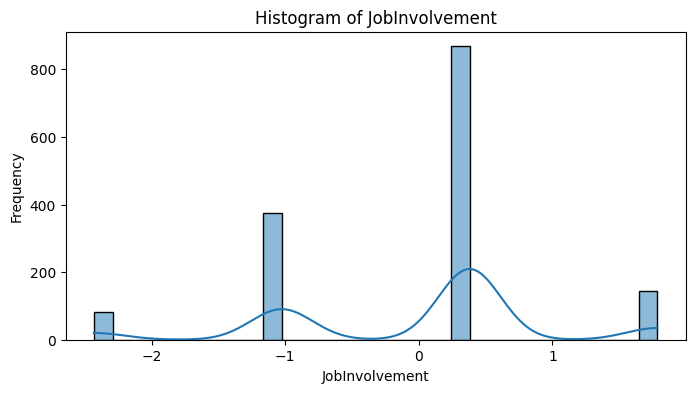

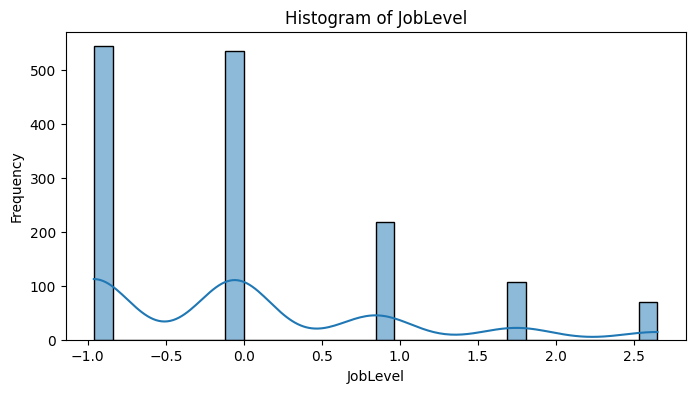

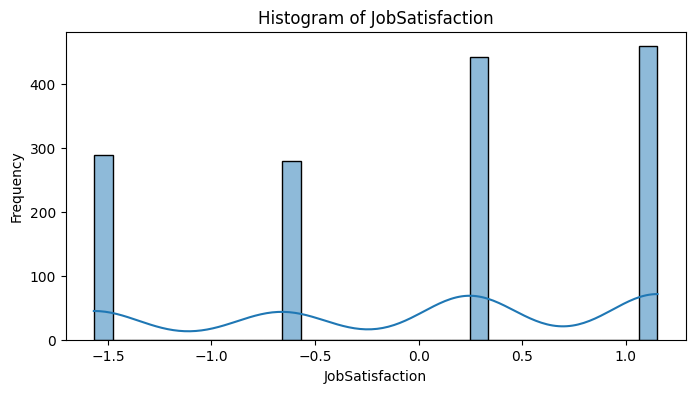

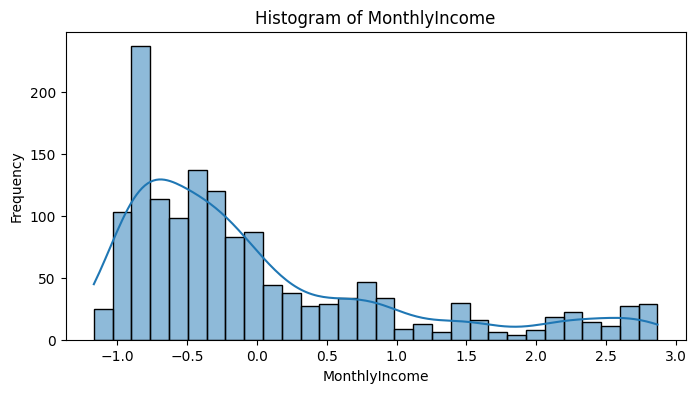

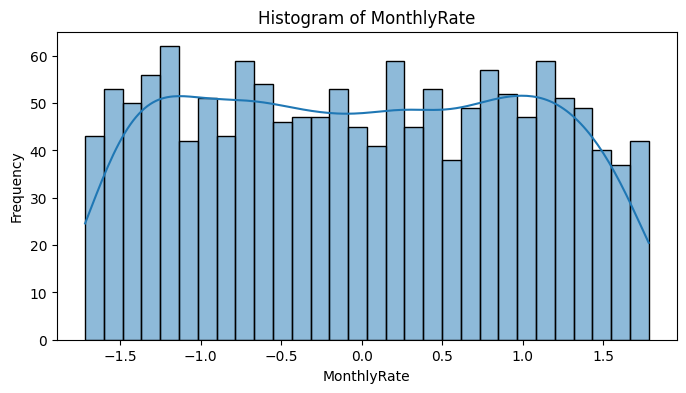

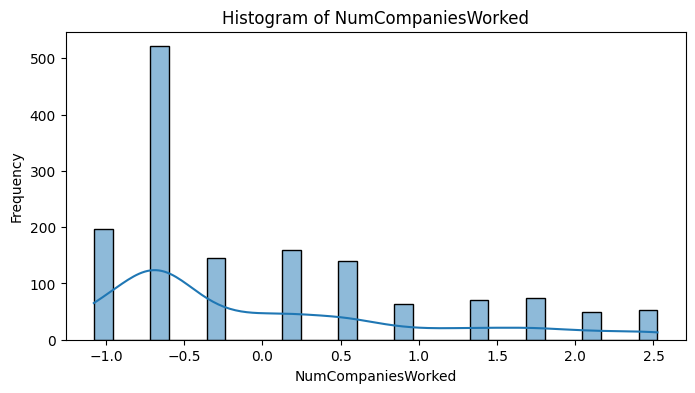

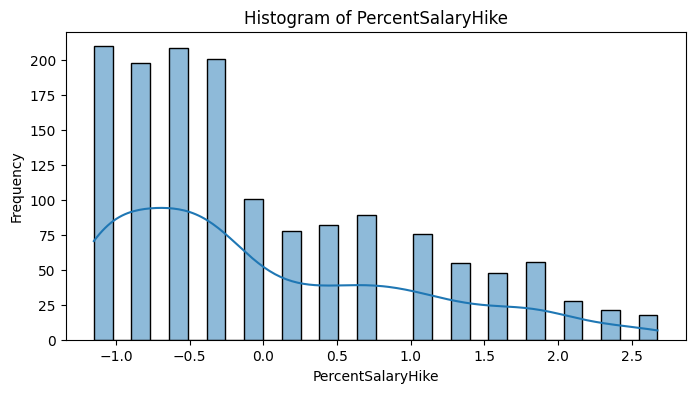

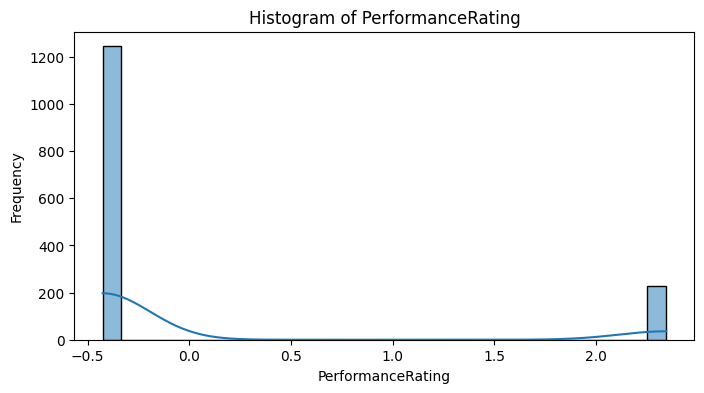

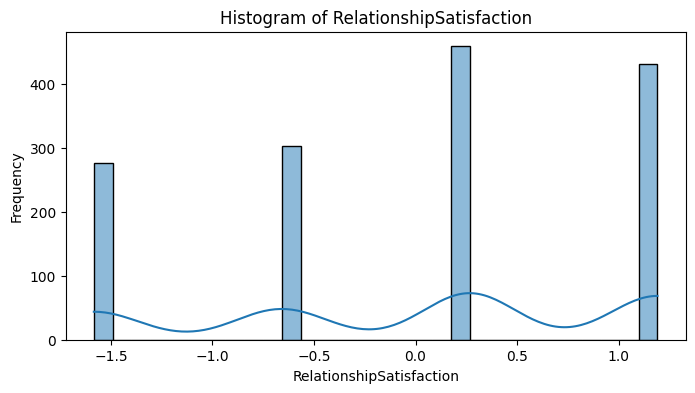

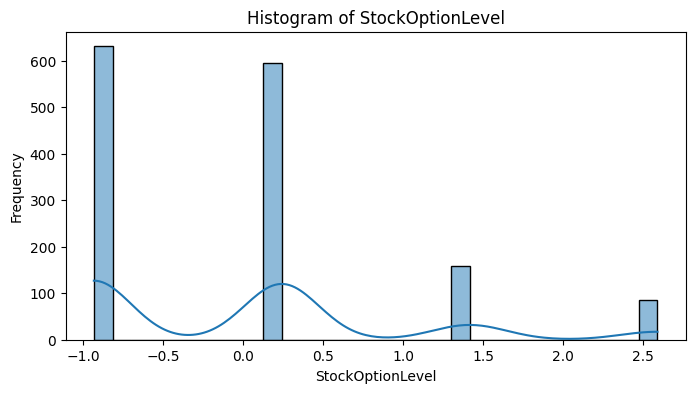

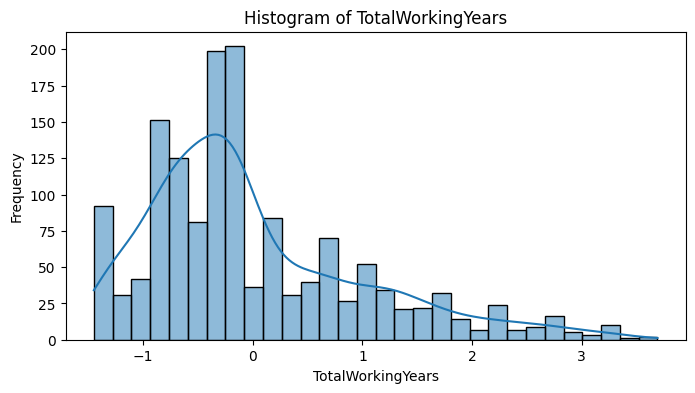

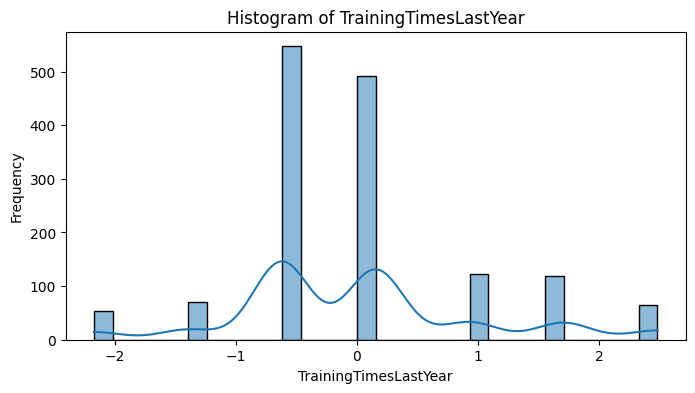

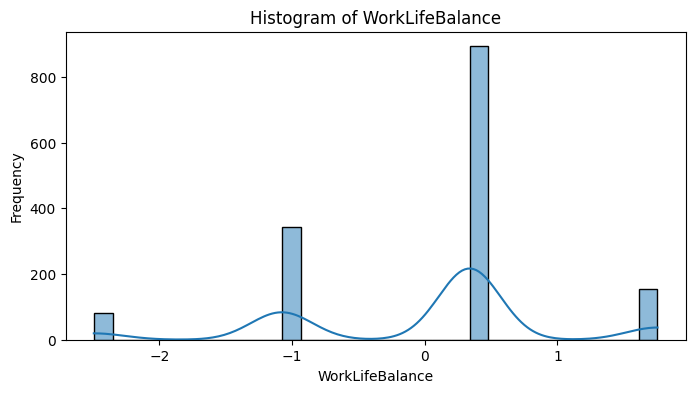

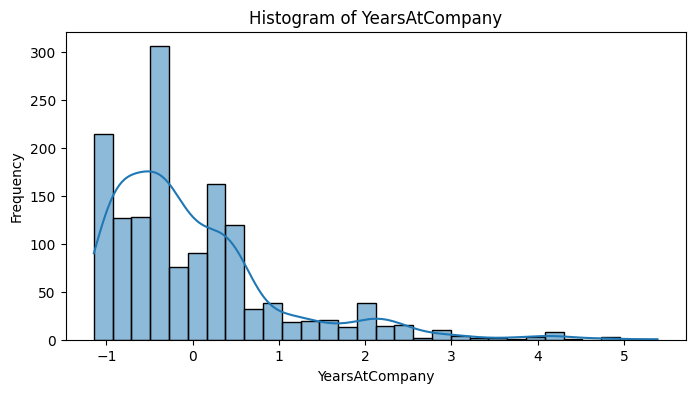

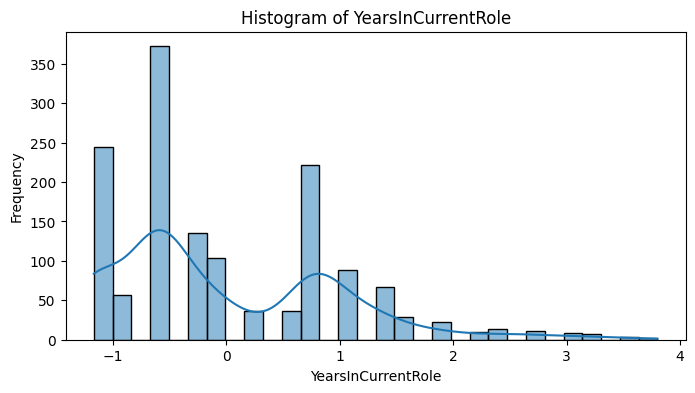

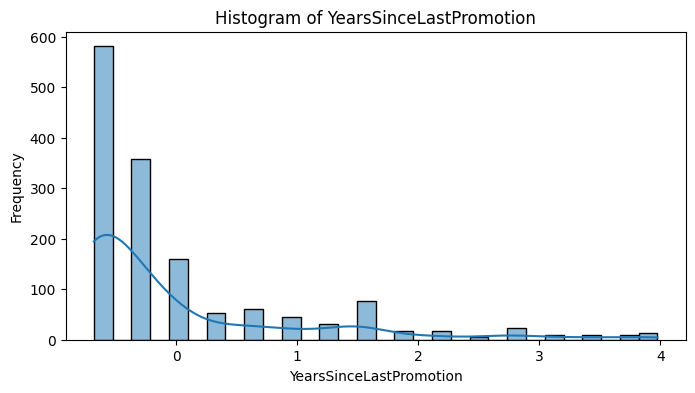

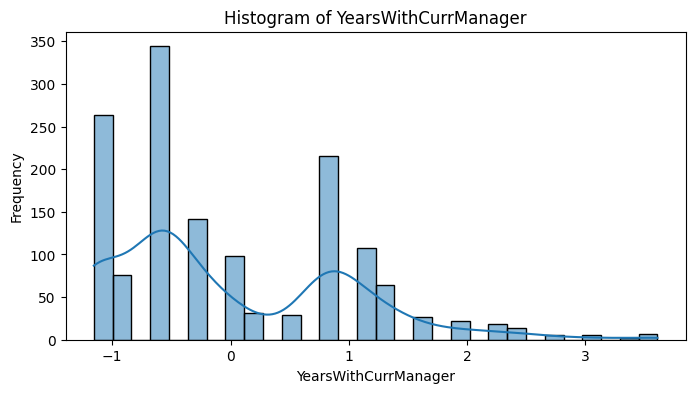

In [89]:
# 6. Univariate Analysis
# 6.1. Histogram for Numerical Features
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

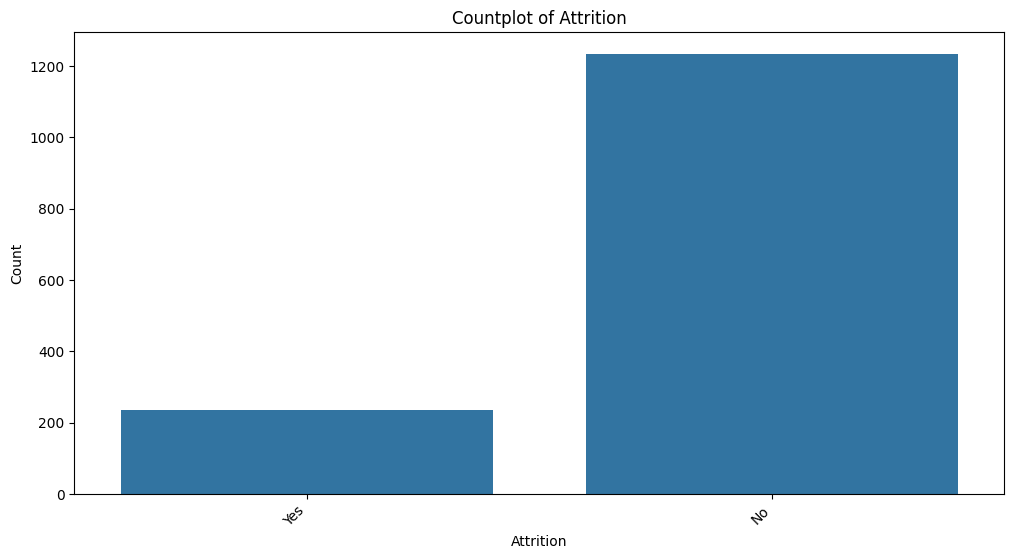

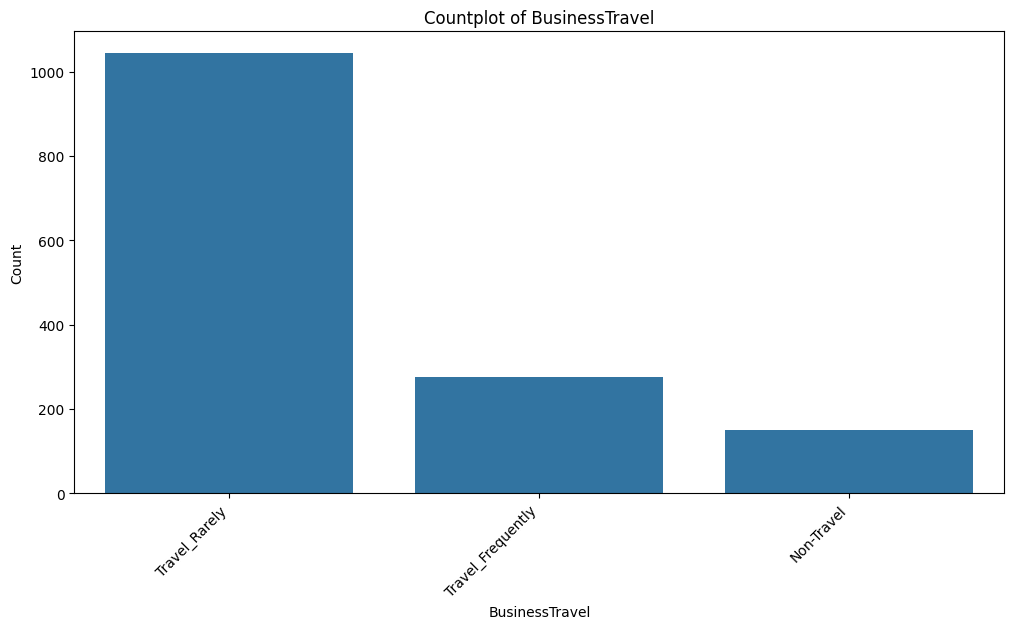

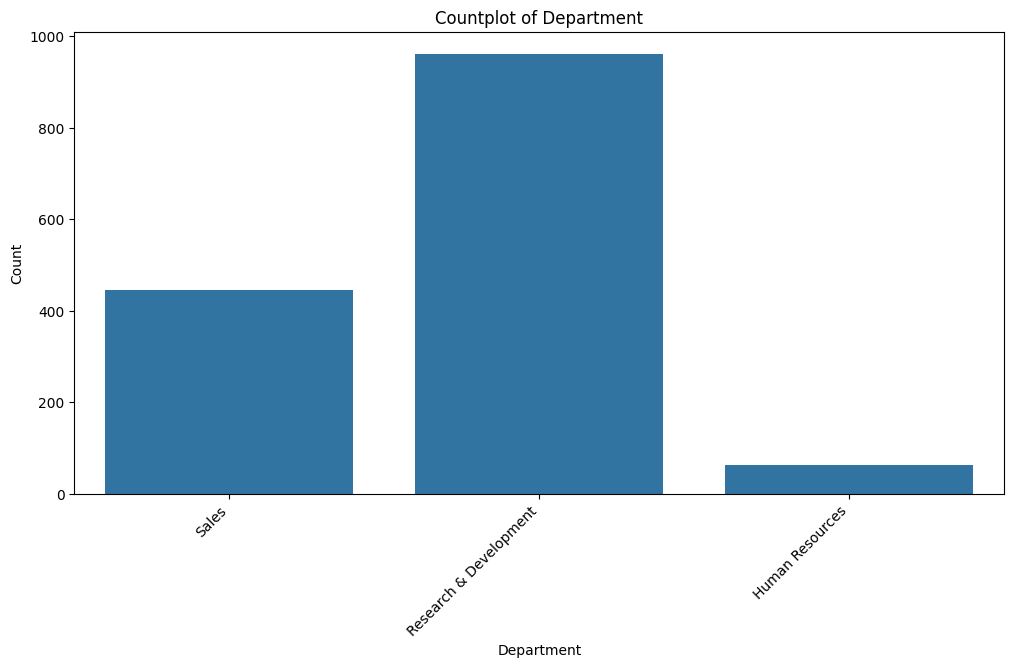

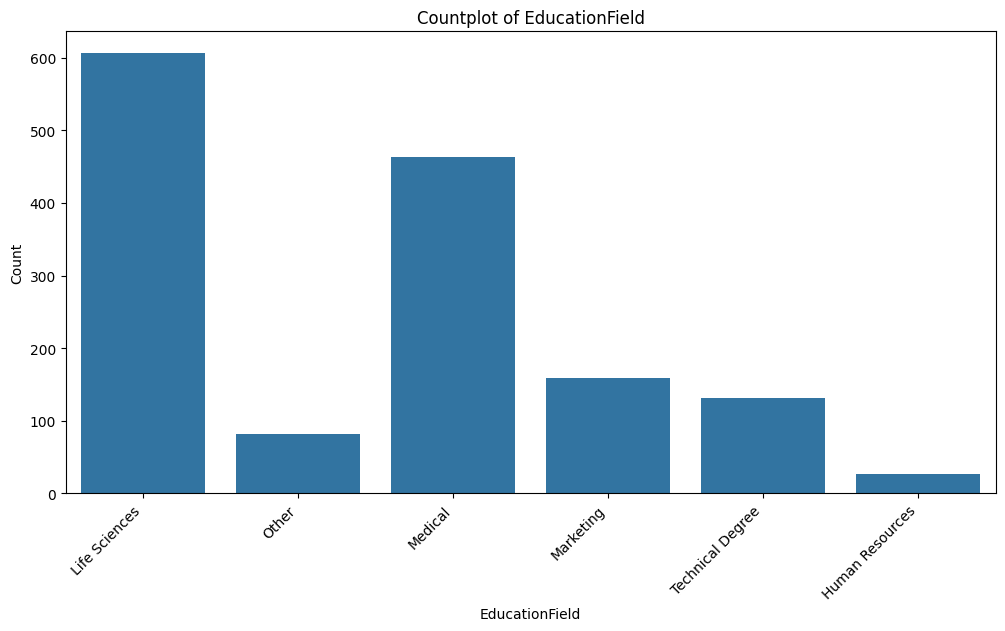

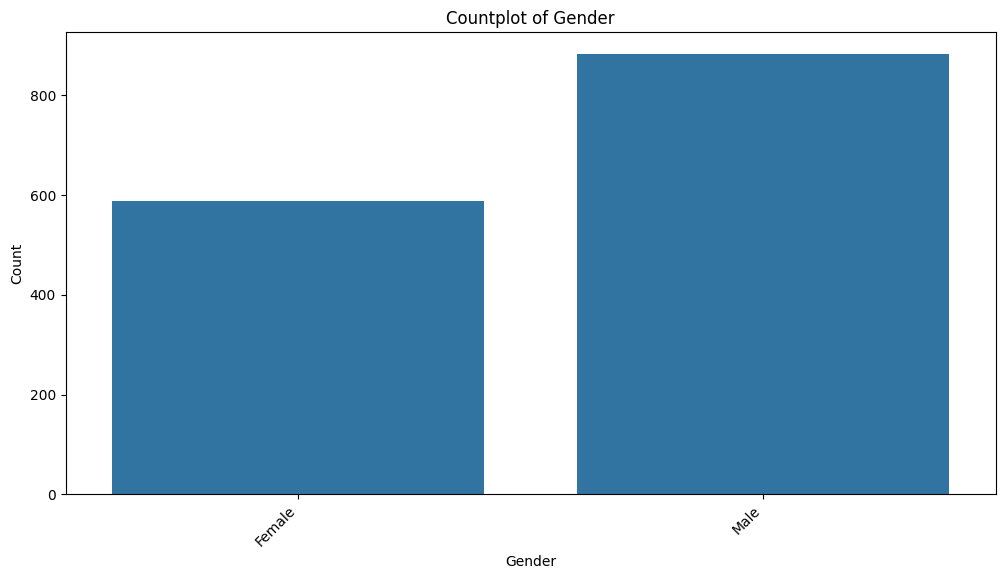

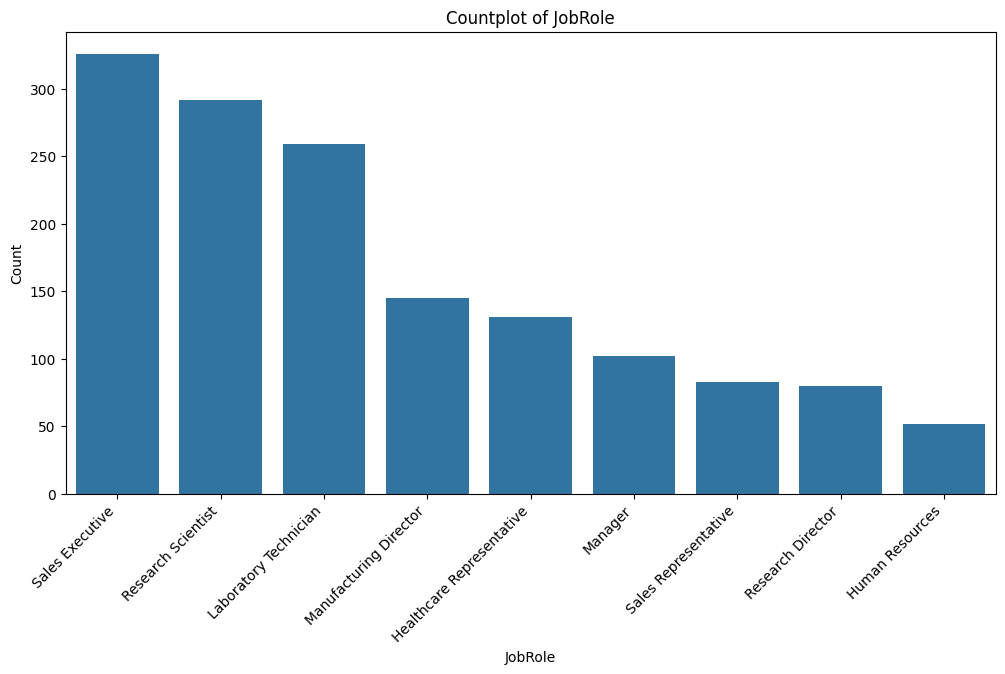

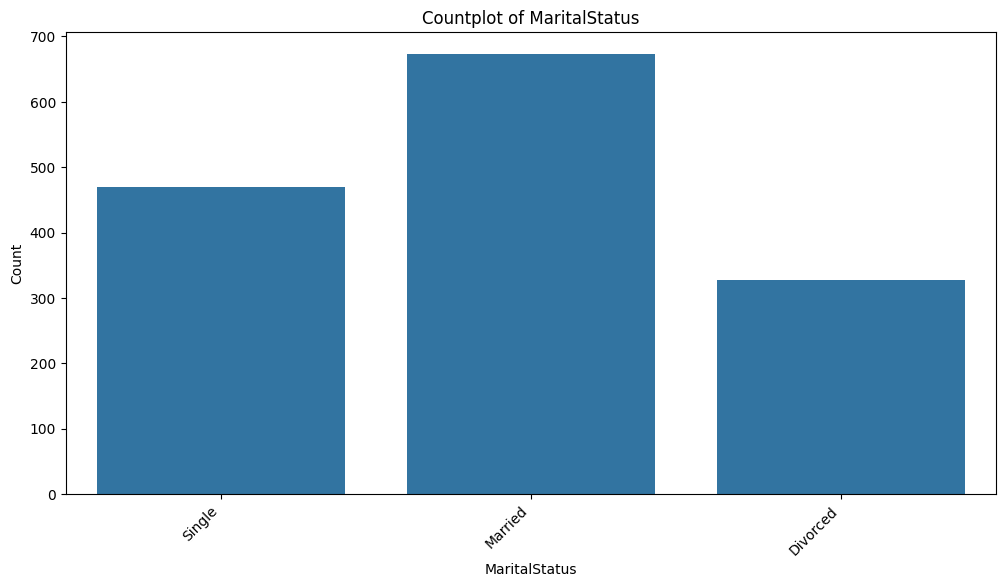

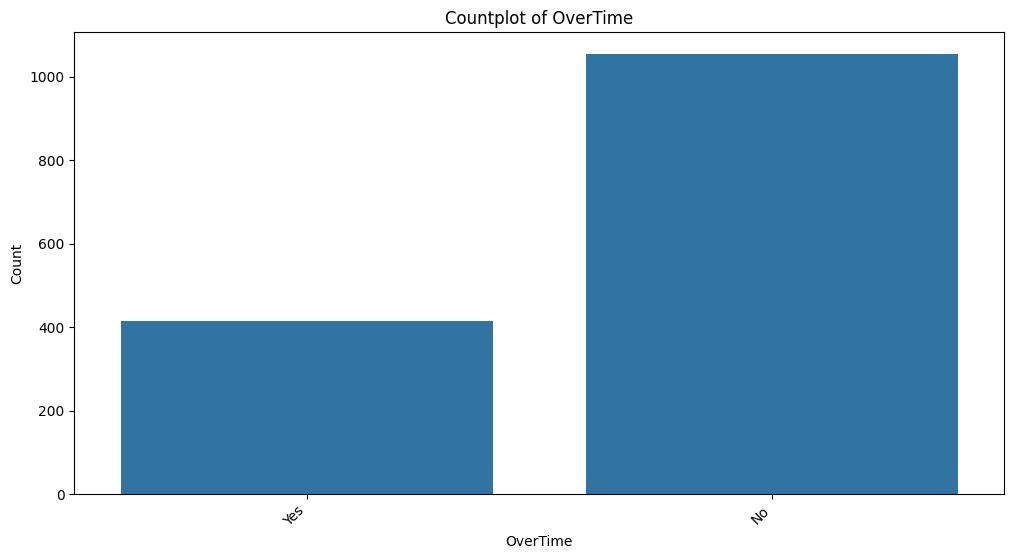

In [90]:
for col in categorical_features:
    plt.figure(figsize=(12, 6))  # Increased figure size
    sns.countplot(x=data[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

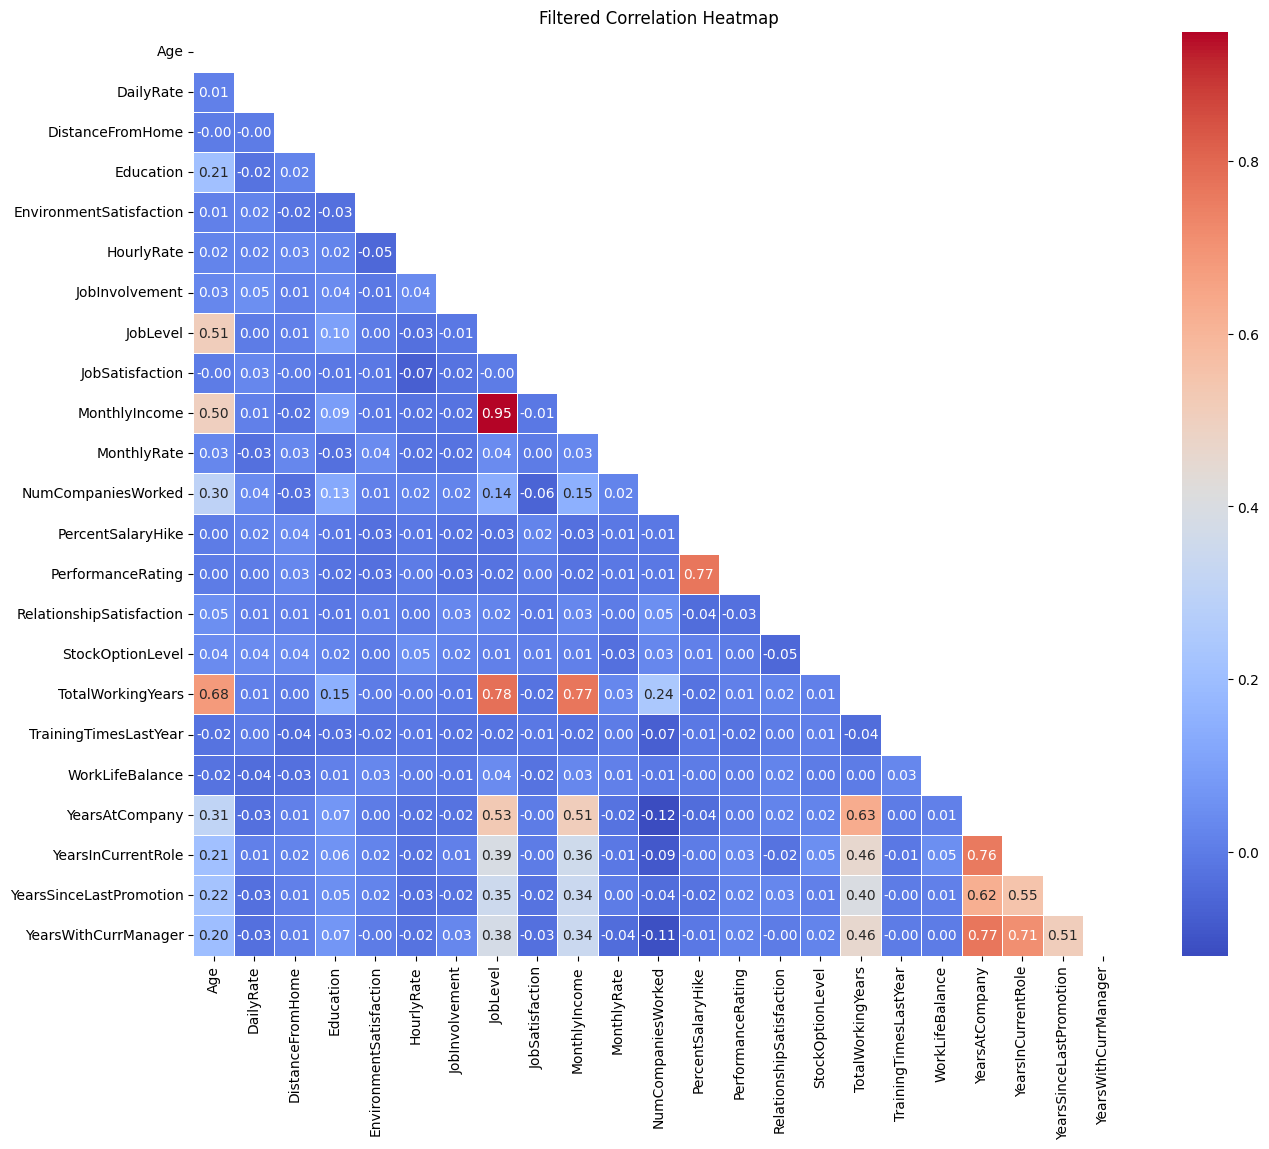

In [91]:
import numpy as np

# 7.1. Improved Correlation Heatmap
# Compute the correlation matrix for numerical columns only
numerical_data = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_data.corr().round(2)

# Filter out features with correlation greater than a threshold (e.g., 0.5)
high_corr_pairs = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]
filtered_features = high_corr_pairs.dropna(axis=0, how='all').dropna(axis=1, how='all').columns
filtered_corr_matrix = corr_matrix.loc[filtered_features, filtered_features]

# Apply a mask to hide the upper triangle
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool))

# Plot the filtered correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(filtered_corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Filtered Correlation Heatmap')
plt.show()


<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


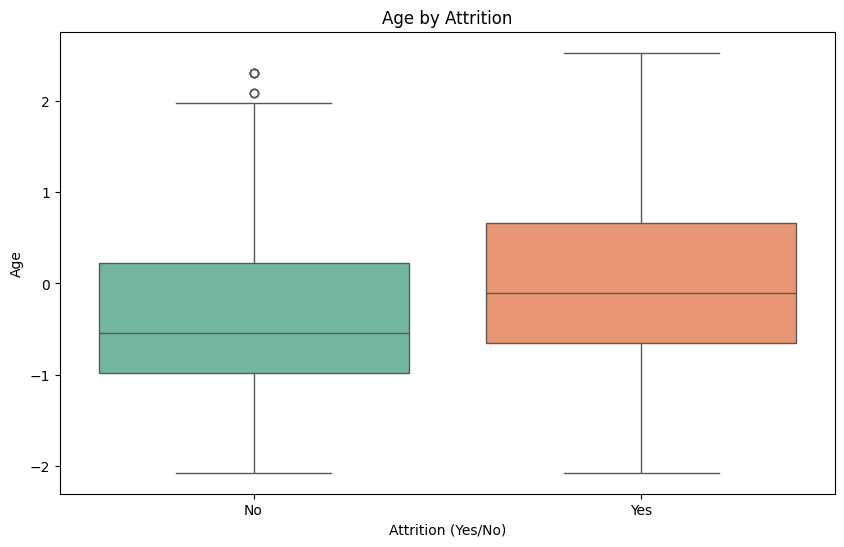

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


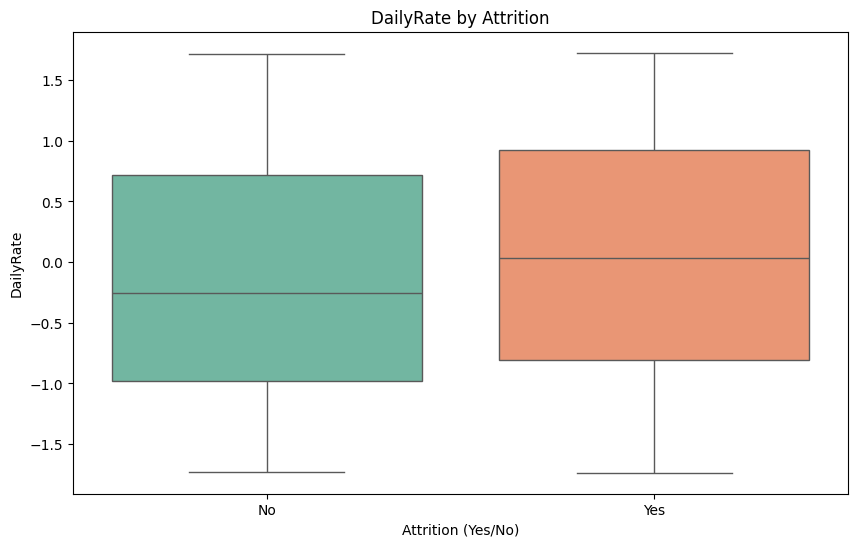

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


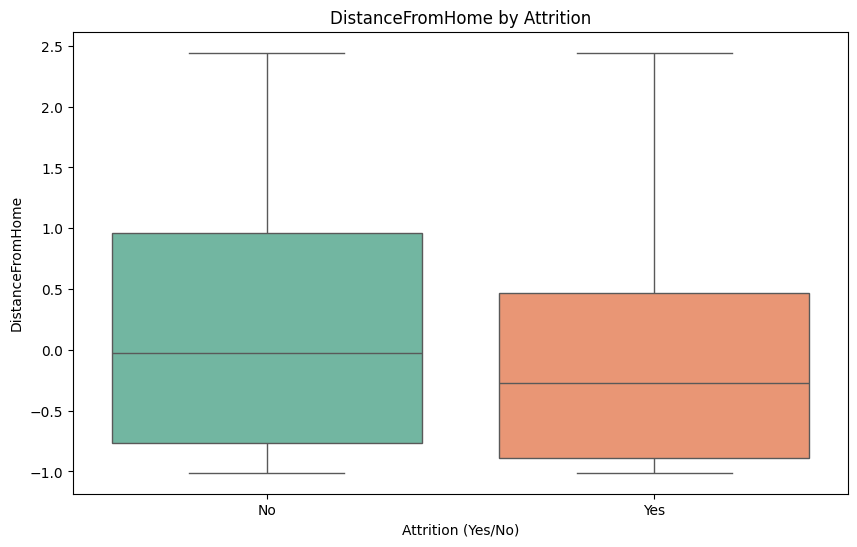

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


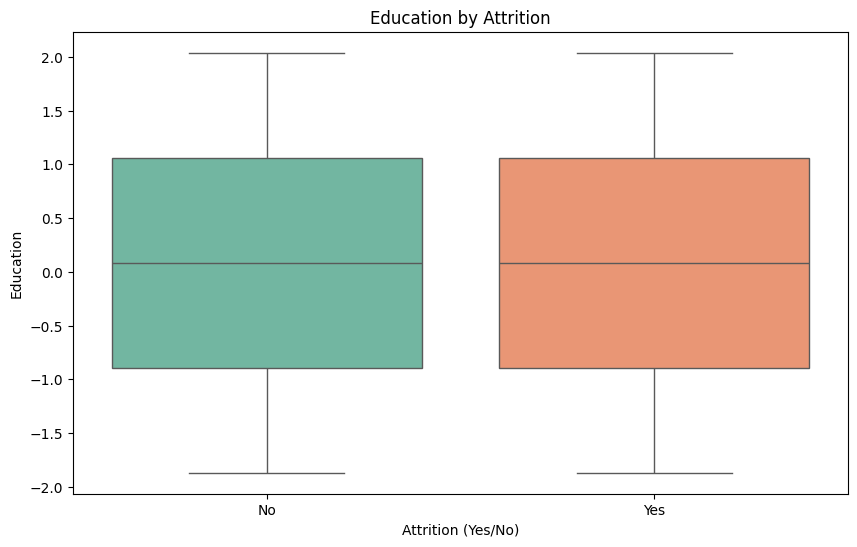

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


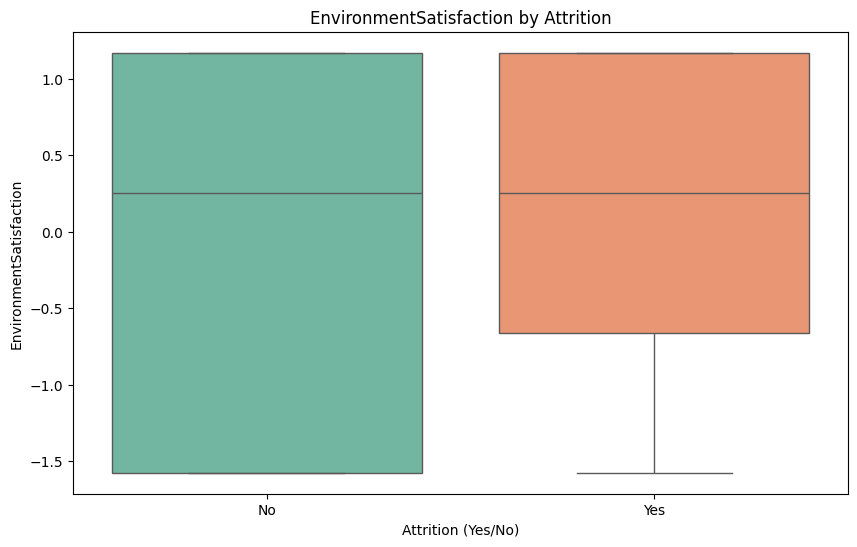

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


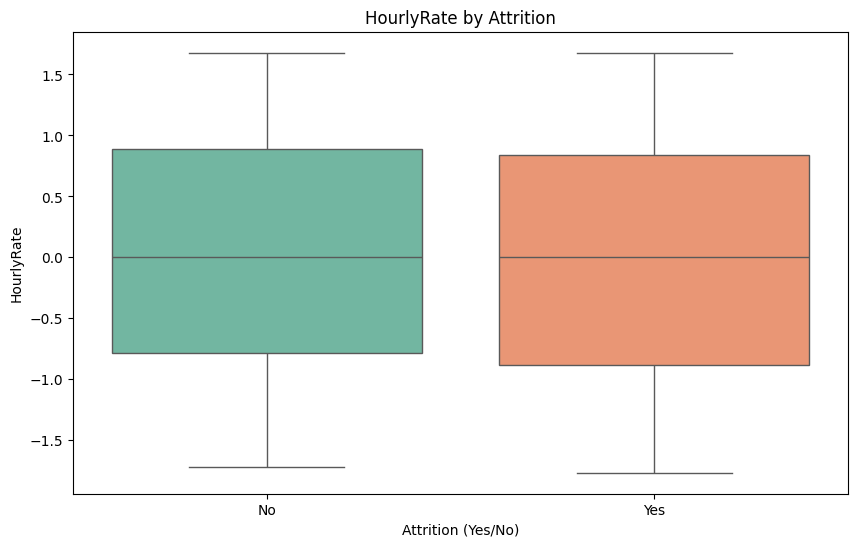

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


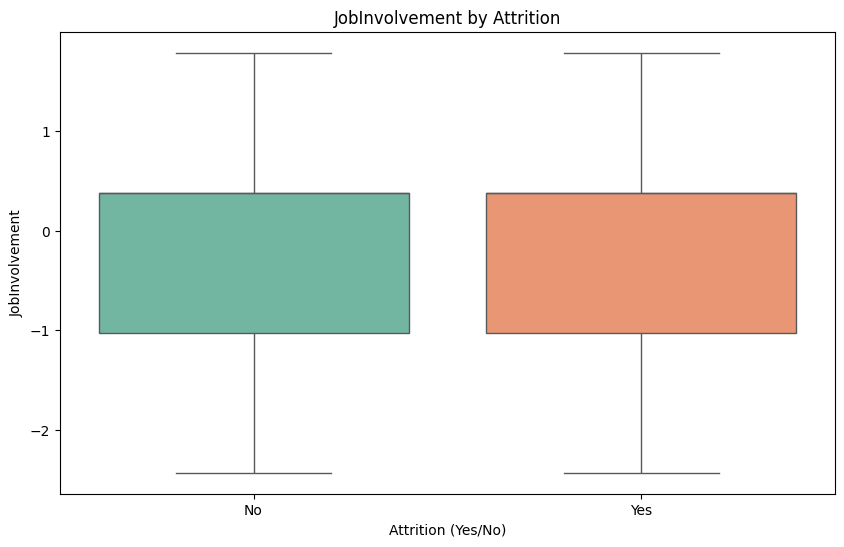

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


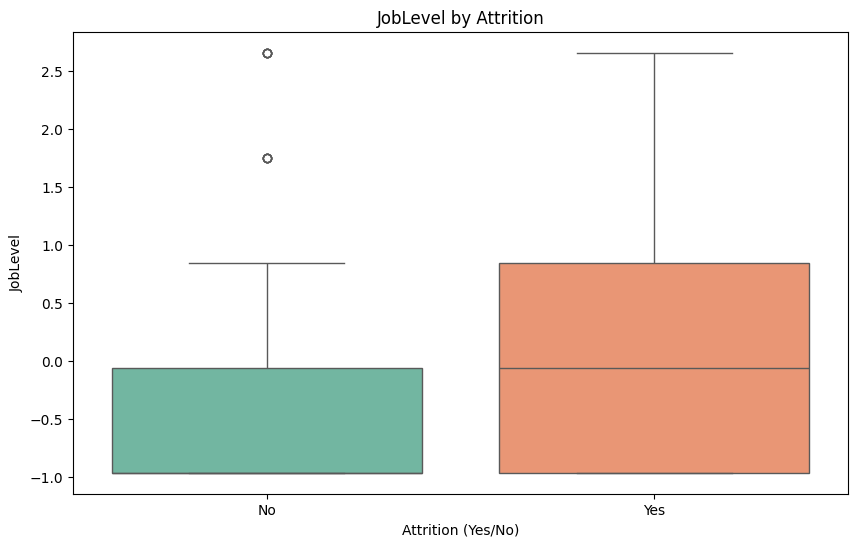

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


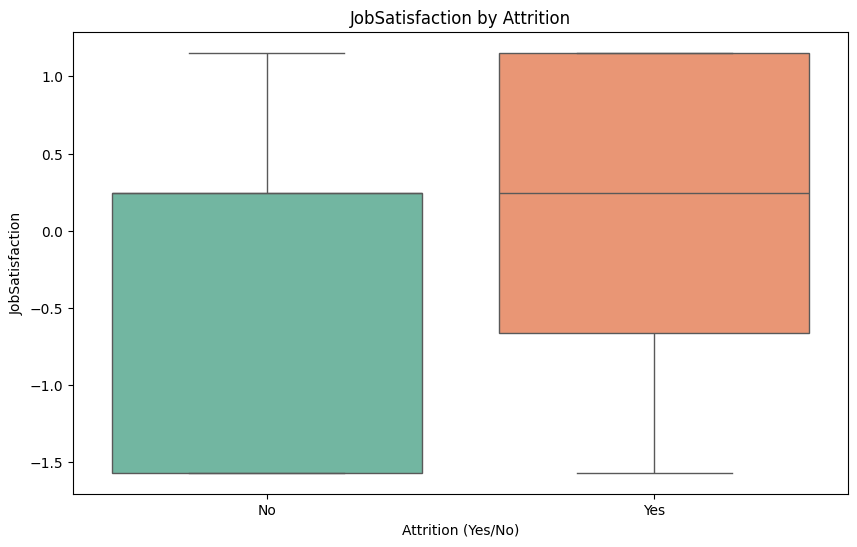

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


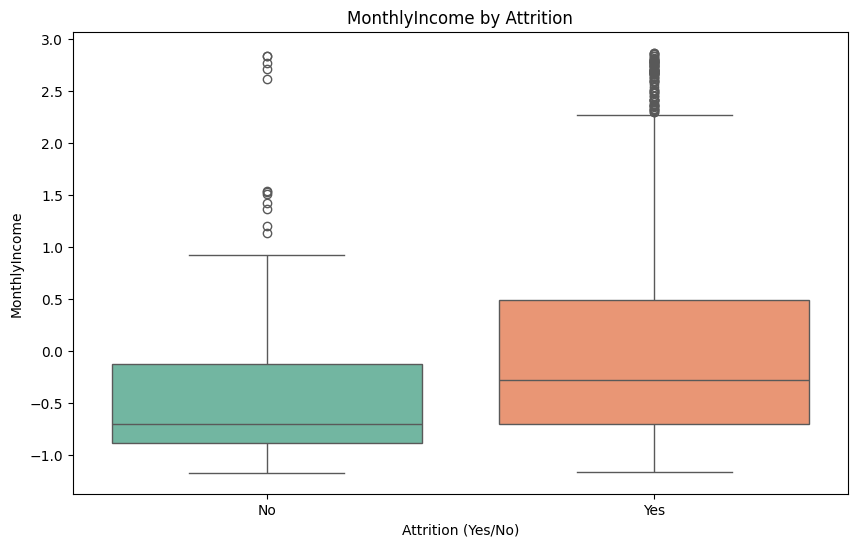

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


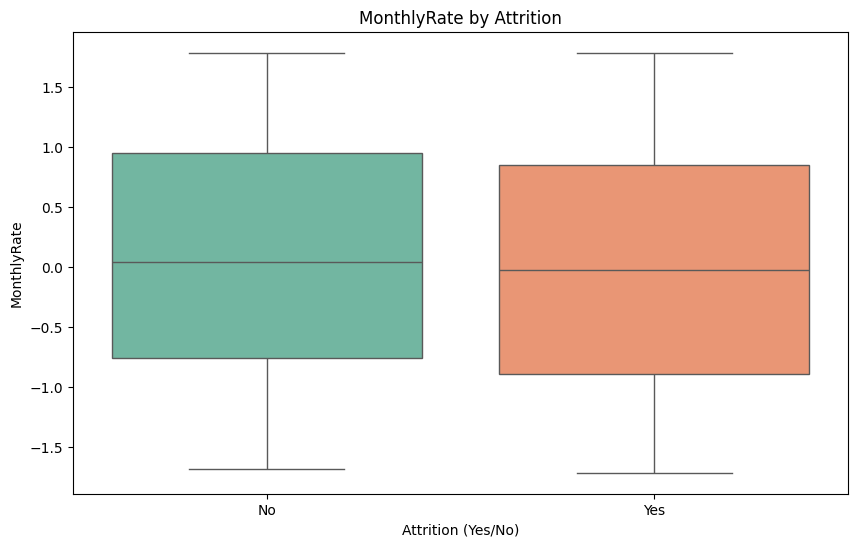

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


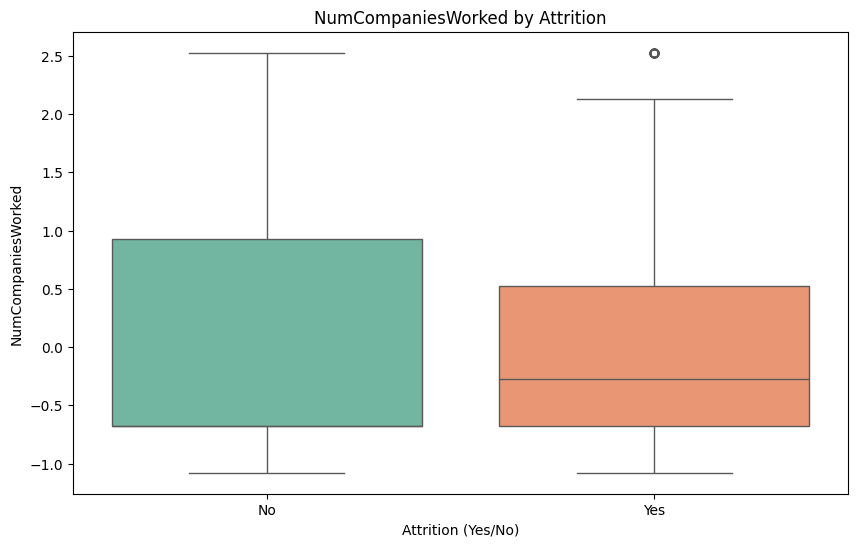

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


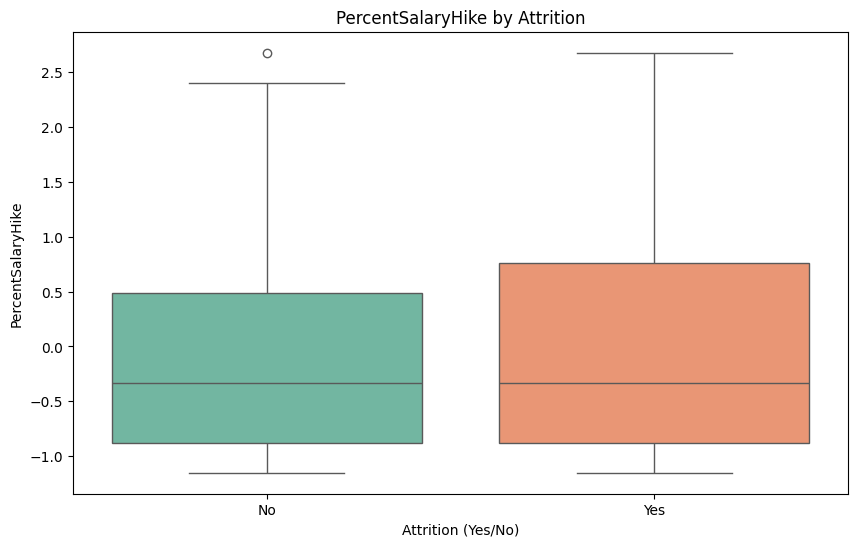

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


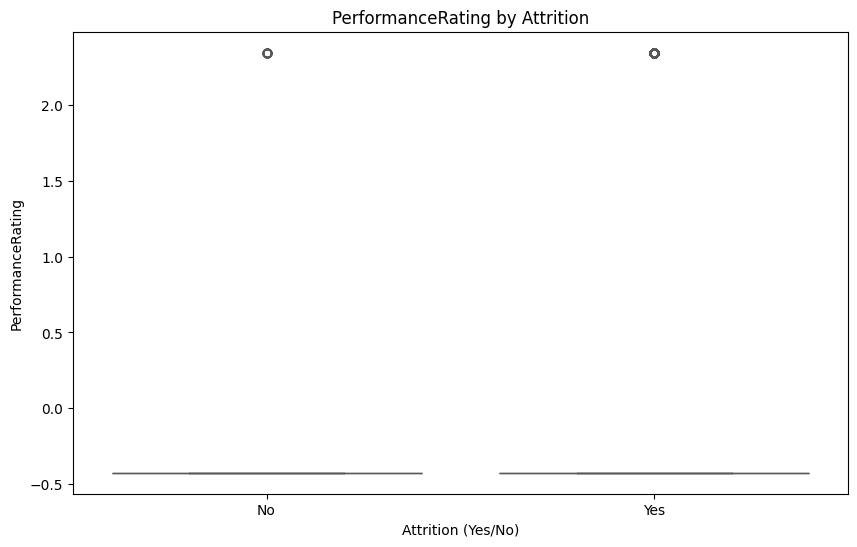

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


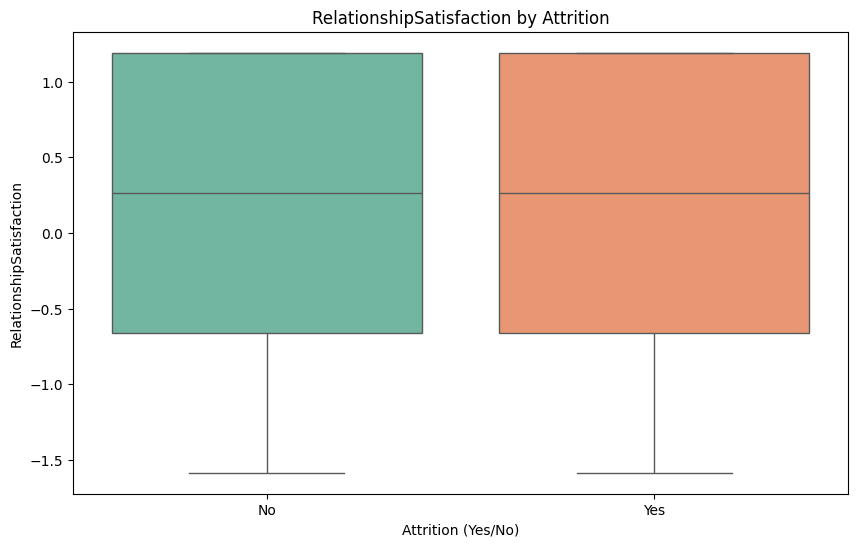

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


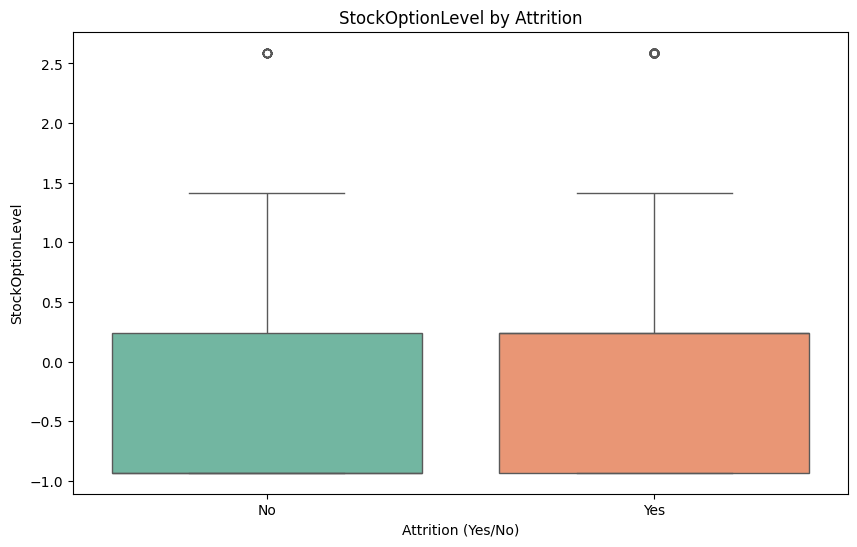

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


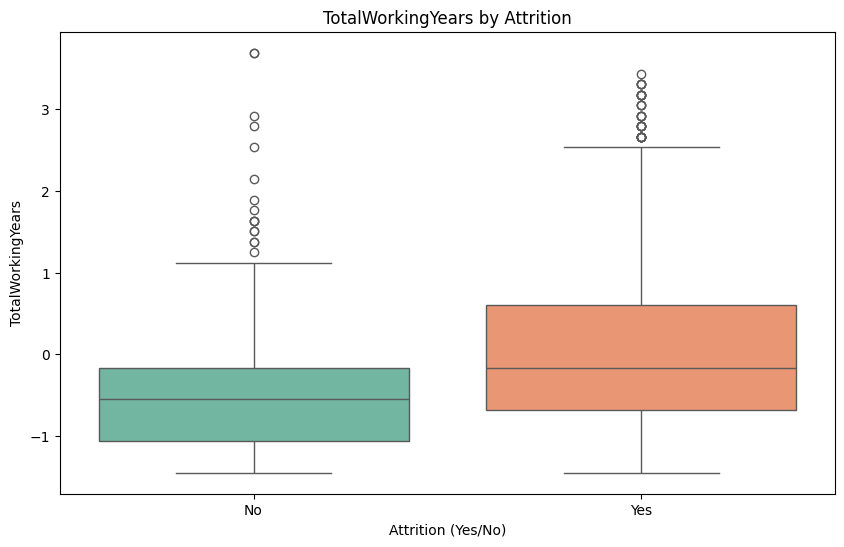

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


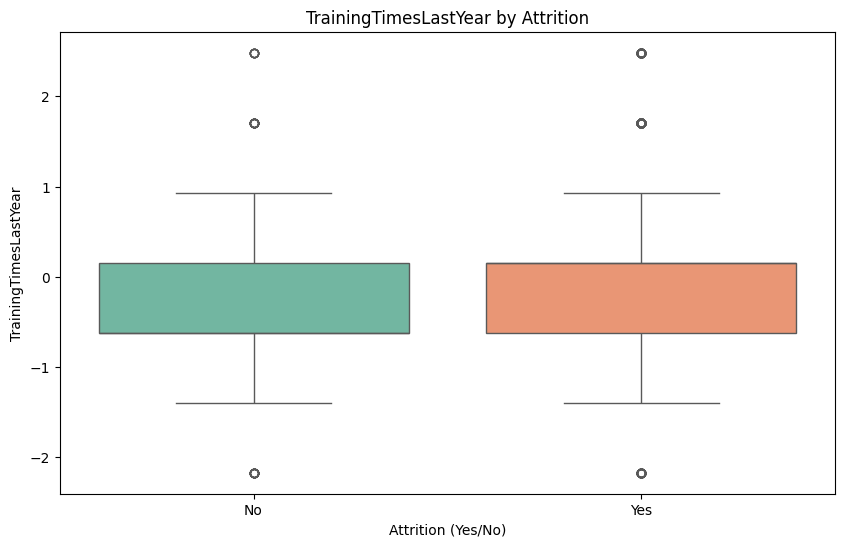

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


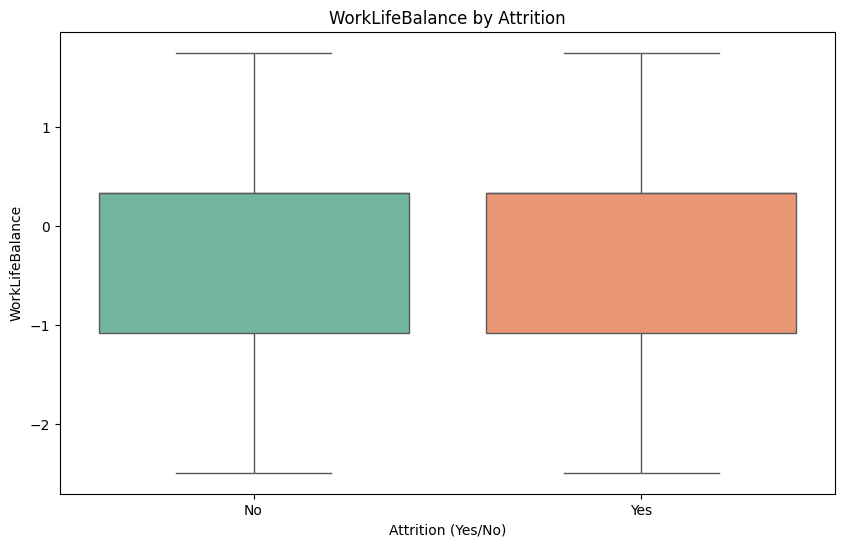

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


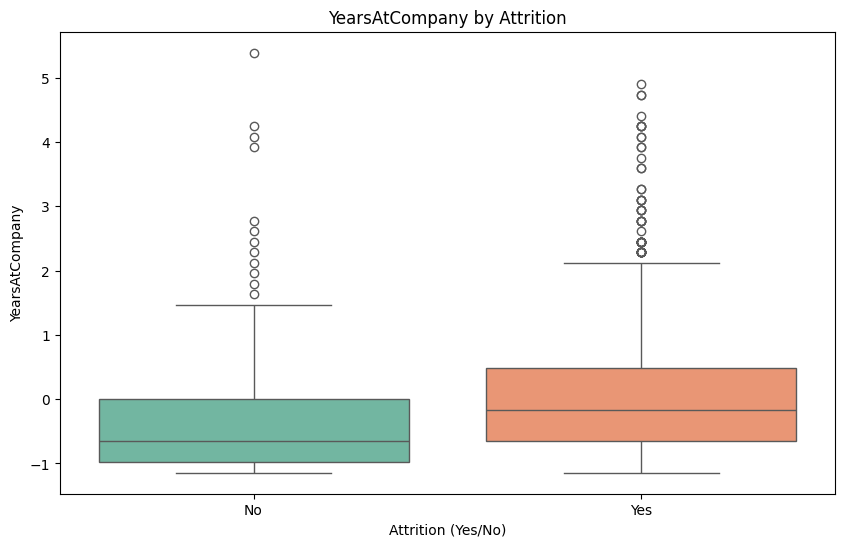

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


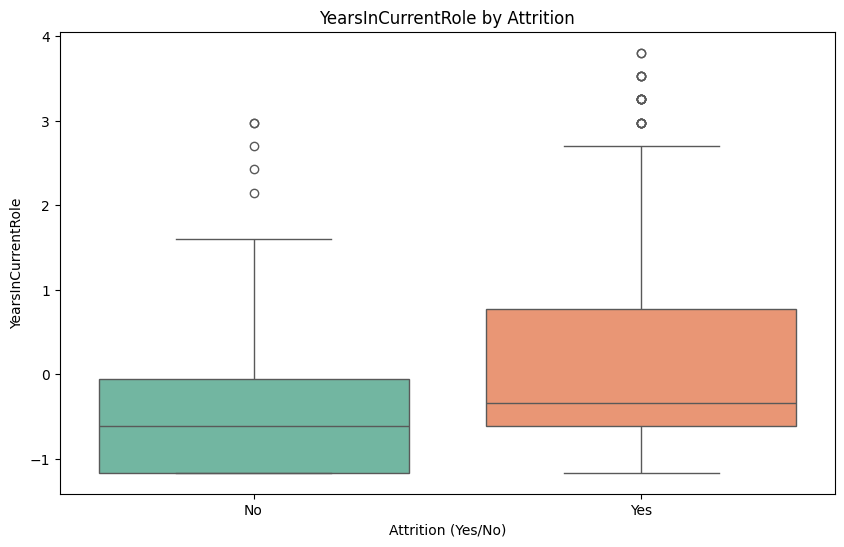

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


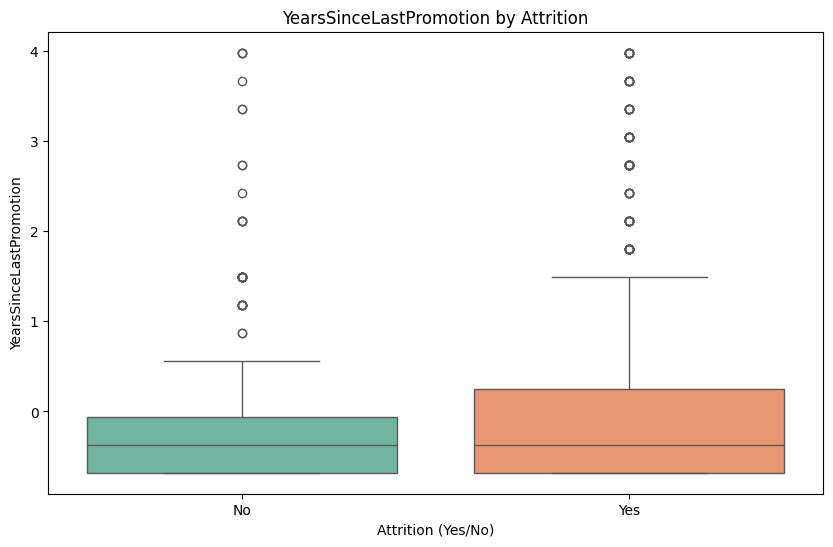

<ipython-input-92-b4a28252d579>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')


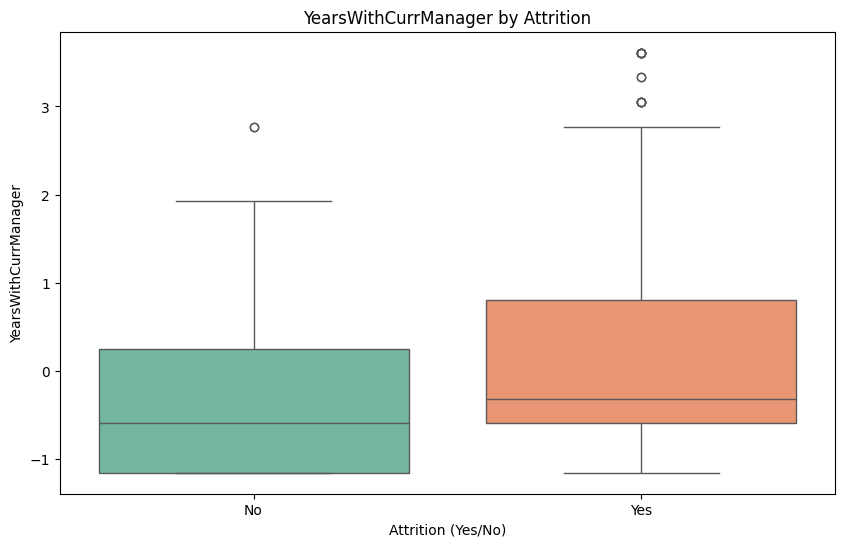

In [92]:
if 'Attrition' in data.columns:
    for col in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Attrition', y=col, data=data, palette='Set2')
        plt.title(f'{col} by Attrition')
        plt.xlabel('Attrition (Yes/No)')
        plt.ylabel(col)
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.show()

# Module 4: Data Summarization and Visualization

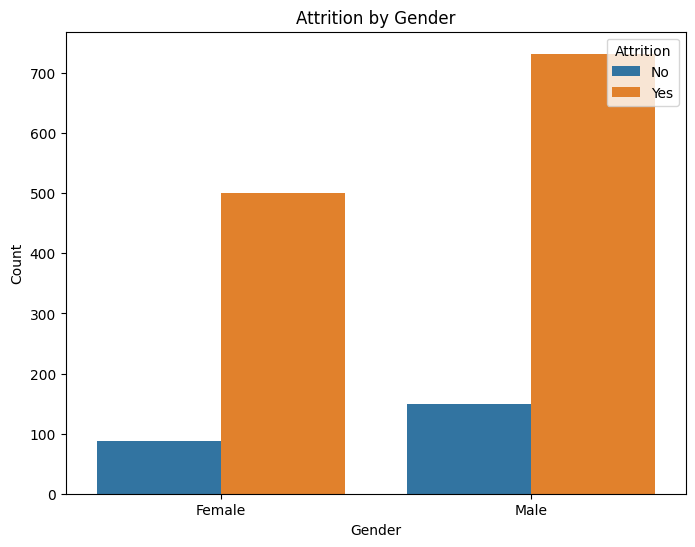

In [131]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

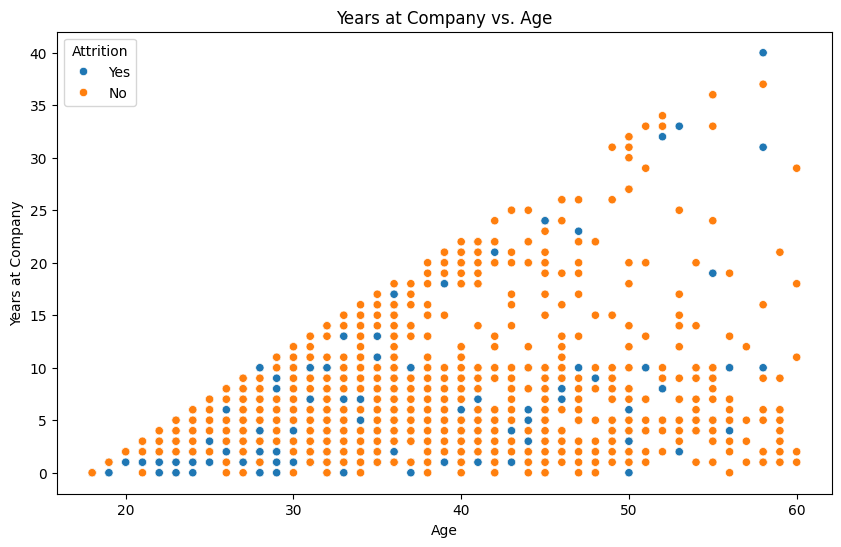

In [132]:
# 14. Years at Company vs. Age
# Analyzing the relationship between years spent at the company and employee age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='YearsAtCompany', hue='Attrition', data=data)
plt.title('Years at Company vs. Age')
plt.xlabel('Age')
plt.ylabel('Years at Company')
plt.legend(title='Attrition', loc='upper left')
plt.show()

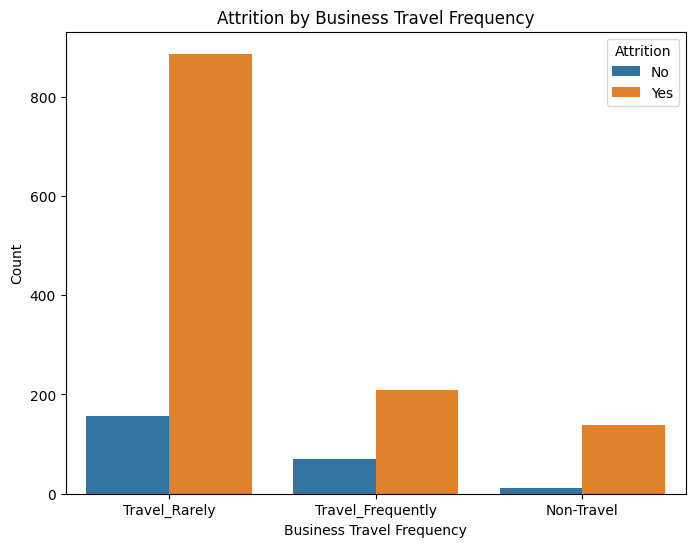

In [134]:
# 15. Impact of Business Travel on Attrition
# Does the frequency of business travel impact employee attrition?
plt.figure(figsize=(8, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=data)
plt.title('Attrition by Business Travel Frequency')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()


<ipython-input-135-0fc0730d392d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobRole', data=data, palette='viridis')


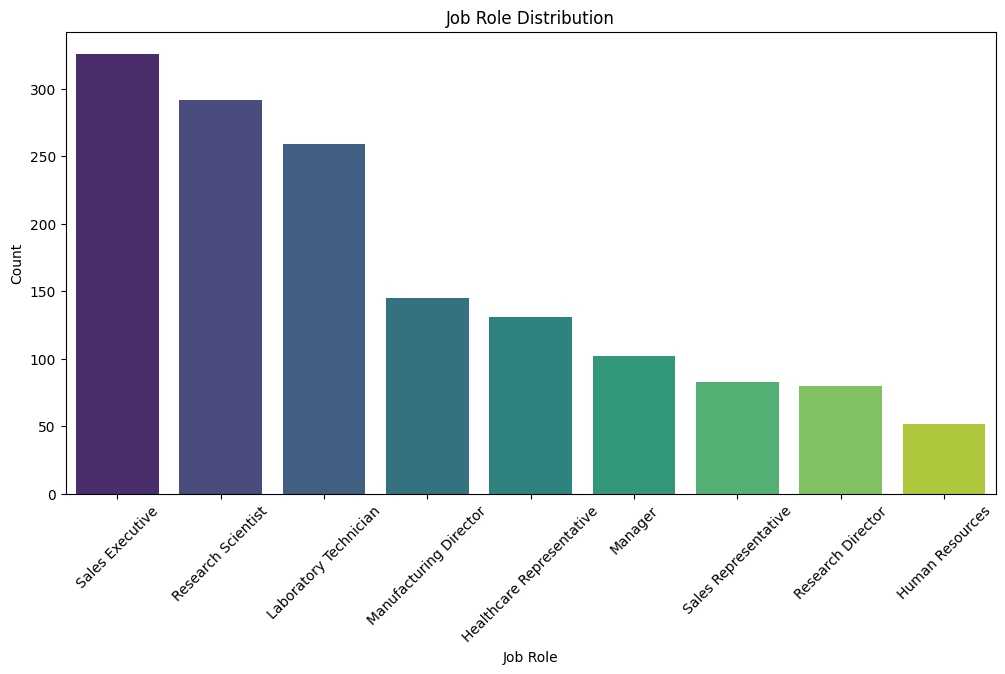

In [135]:
# 16. Job Role Distribution
# Understanding the distribution of employees across different job roles
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', data=data, palette='viridis')
plt.title('Job Role Distribution')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-136-07c2660daf3a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EnvironmentSatisfaction', data=data, hue=None, palette='Blues')


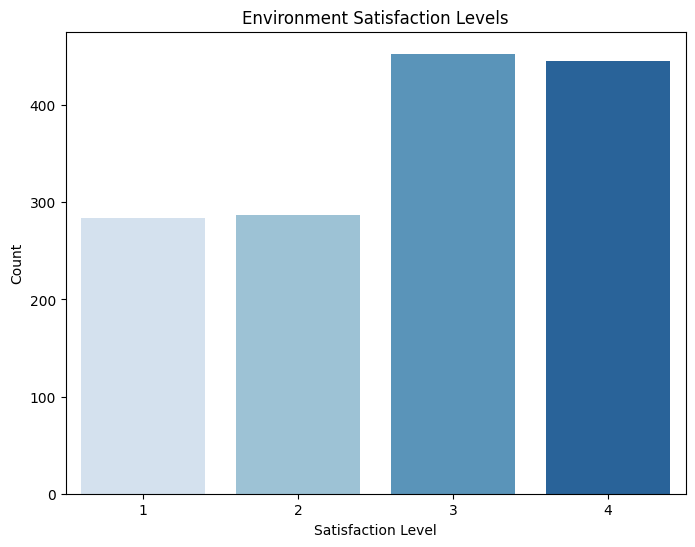

In [136]:
# 17. Environment Satisfaction Analysis
# Analyzing satisfaction levels for different environments
plt.figure(figsize=(8, 6))
sns.countplot(x='EnvironmentSatisfaction', data=data, hue=None, palette='Blues')
plt.title('Environment Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()


<ipython-input-137-37139e91b878>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobLevel', y='MonthlyIncome', data=data, palette='muted')


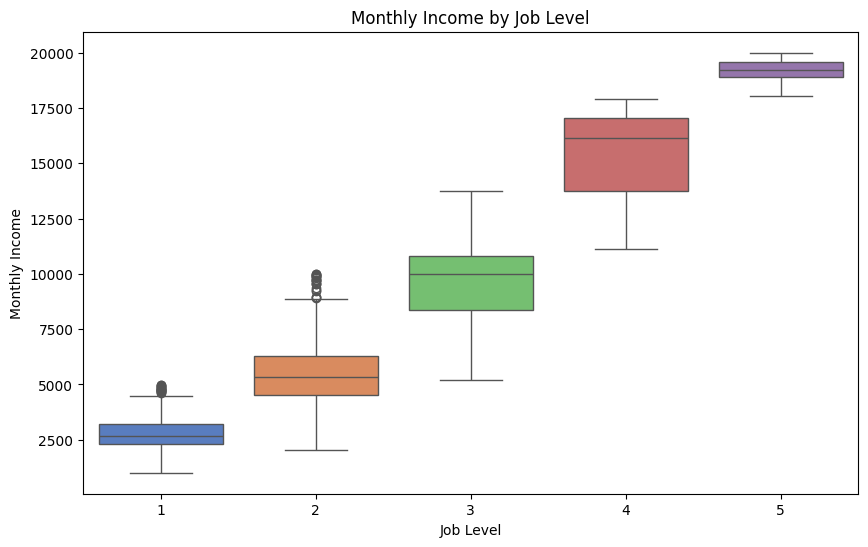

In [137]:
# 18. Monthly Income vs. Job Level
# How does income vary with the level of the job?
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=data, palette='muted')
plt.title('Monthly Income by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.show()


<ipython-input-138-e9fdab8d1c5c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatisfaction', y='TotalWorkingYears', data=data, palette='pastel')


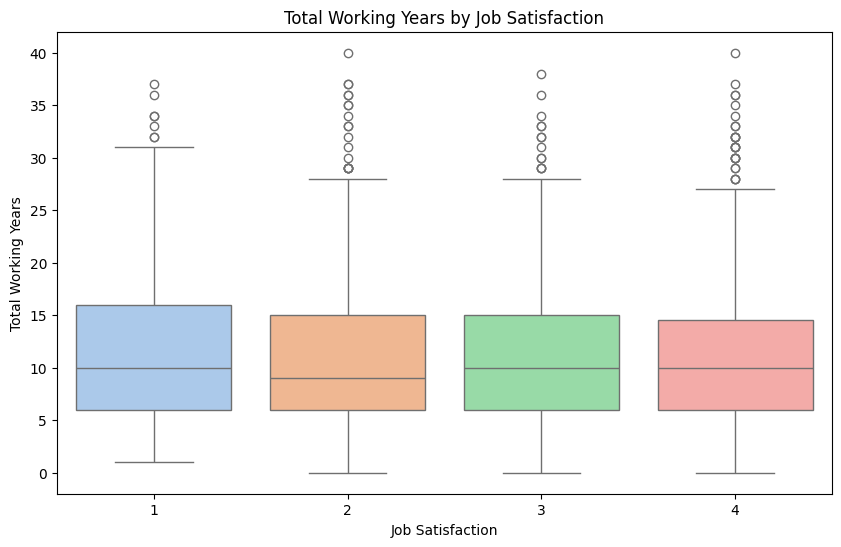

In [138]:
# 19. Total Working Years vs. Job Satisfaction
# Is there any observable trend in job satisfaction based on total working years?
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatisfaction', y='TotalWorkingYears', data=data, palette='pastel')
plt.title('Total Working Years by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Total Working Years')
plt.show()

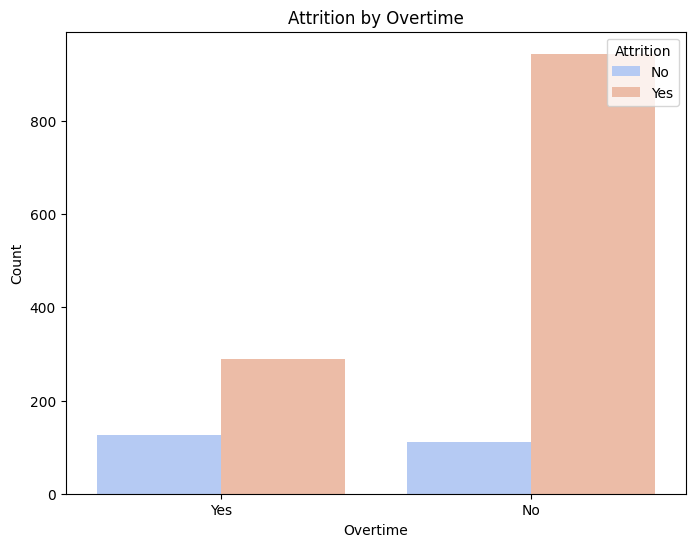

In [139]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='Attrition', data=data, palette='coolwarm')
plt.title('Attrition by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()

<ipython-input-140-da77079a7b1a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Attrition'] == 'Yes'], x='Age', label='Attrition: Yes', shade=True)
<ipython-input-140-da77079a7b1a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Attrition'] == 'No'], x='Age', label='Attrition: No', shade=True)


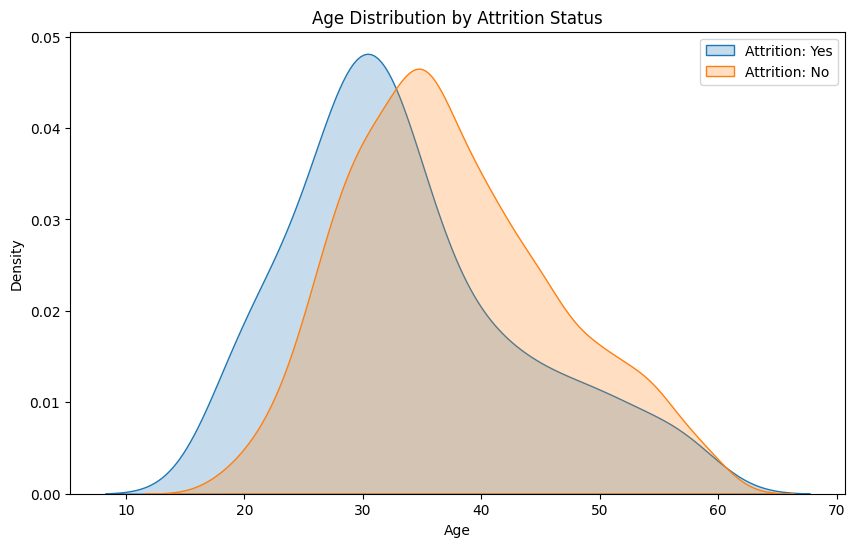

In [140]:
# 22. Age Distribution with KDE by Attrition
# Overlaying age distribution with KDE plots for attrition to see differences
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['Attrition'] == 'Yes'], x='Age', label='Attrition: Yes', shade=True)
sns.kdeplot(data=data[data['Attrition'] == 'No'], x='Age', label='Attrition: No', shade=True)
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

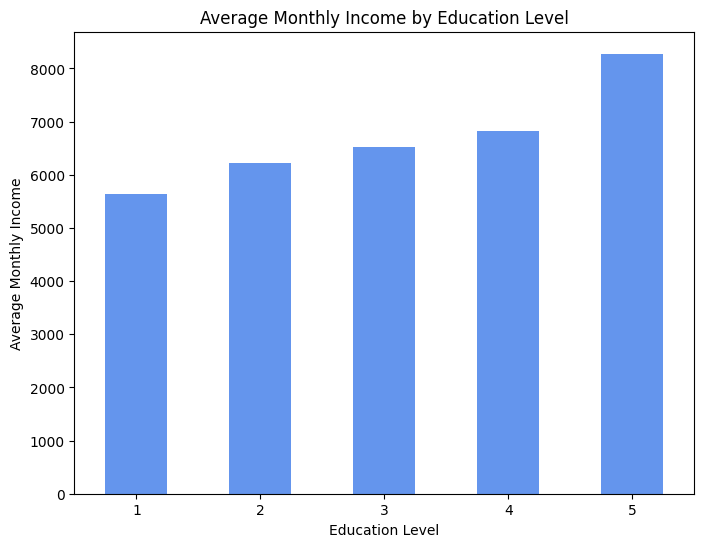

In [141]:
# 23. Average Monthly Income per Education Level
# How does the average monthly income vary with the education level of employees?
education_avg_income = data.groupby('Education')['MonthlyIncome'].mean()
plt.figure(figsize=(8, 6))
education_avg_income.plot(kind='bar', color='cornflowerblue')
plt.title('Average Monthly Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=0)
plt.show()

<ipython-input-142-8731f84c724d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_attrition, x='Gender', palette='muted')


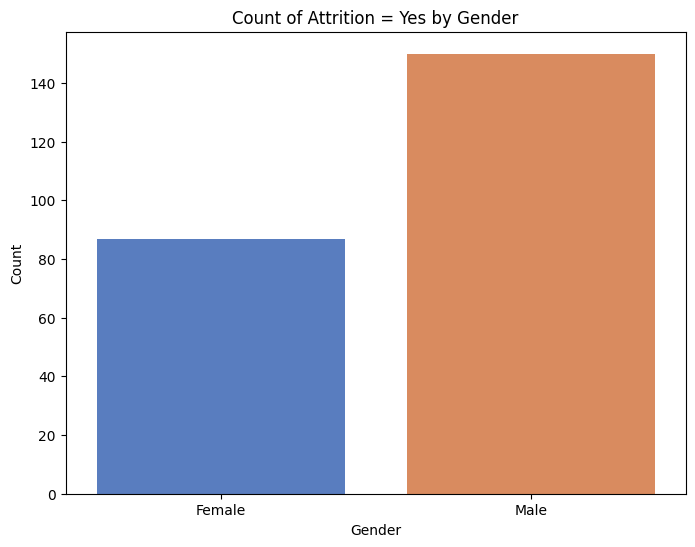

In [142]:
# 1. Count of Attrition by Gender
# Filter data for employees who have left the company
yes_attrition = data[data['Attrition'] == 'Yes']

# Plotting attrition count by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=yes_attrition, x='Gender', palette='muted')
plt.title('Count of Attrition = Yes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


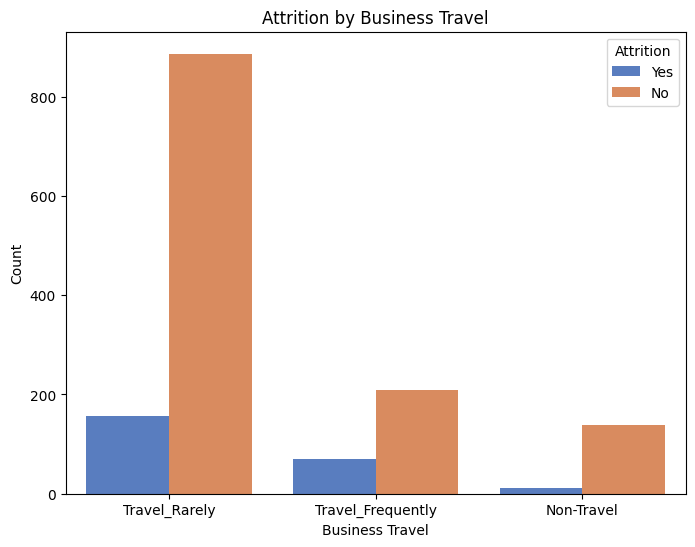

In [143]:
# Observing that the number of males is greater than the number of females in both attrition groups (Yes and No)

# 2. How is Attrition Affected by Business Travels?
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='BusinessTravel', hue='Attrition', palette='muted')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()


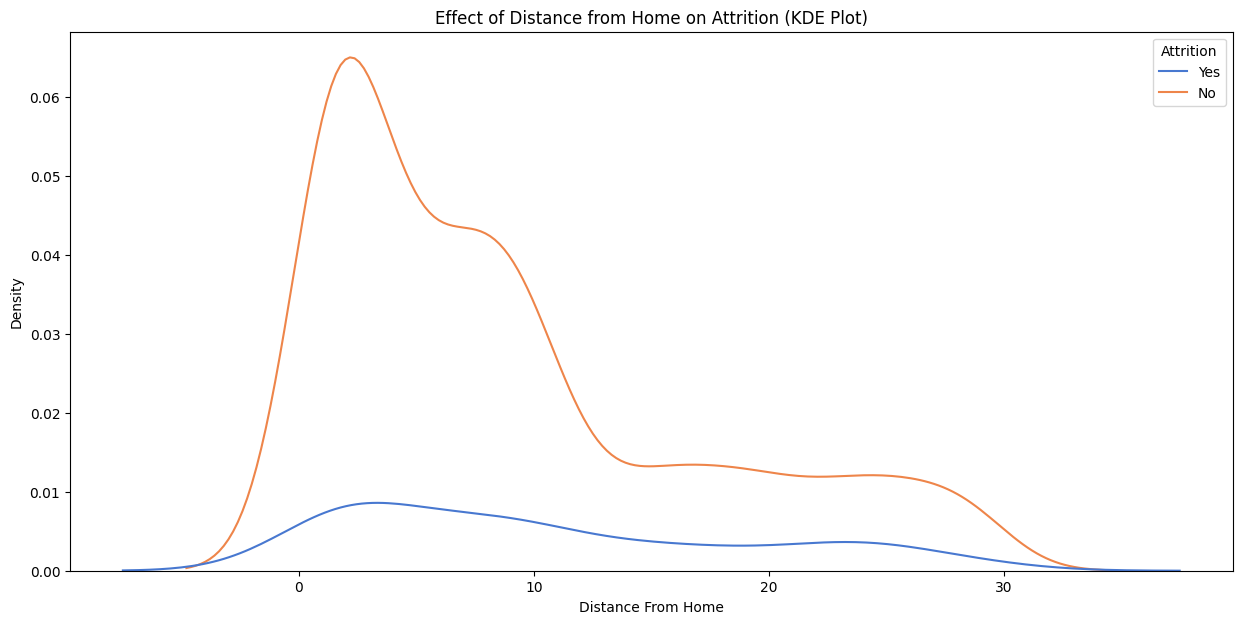

In [144]:
# KDE plot to observe distribution by attrition
plt.figure(figsize=(15, 7))
sns.kdeplot(data=data, x="DistanceFromHome", hue="Attrition", palette='muted')
plt.title('Effect of Distance from Home on Attrition (KDE Plot)')
plt.xlabel('Distance From Home')
plt.ylabel('Density')
plt.show()


The department with the most attritions is 'Research & Development' with 133 attritions.


<ipython-input-145-78ec70298b8e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department', data=attrition_data, palette='muted')


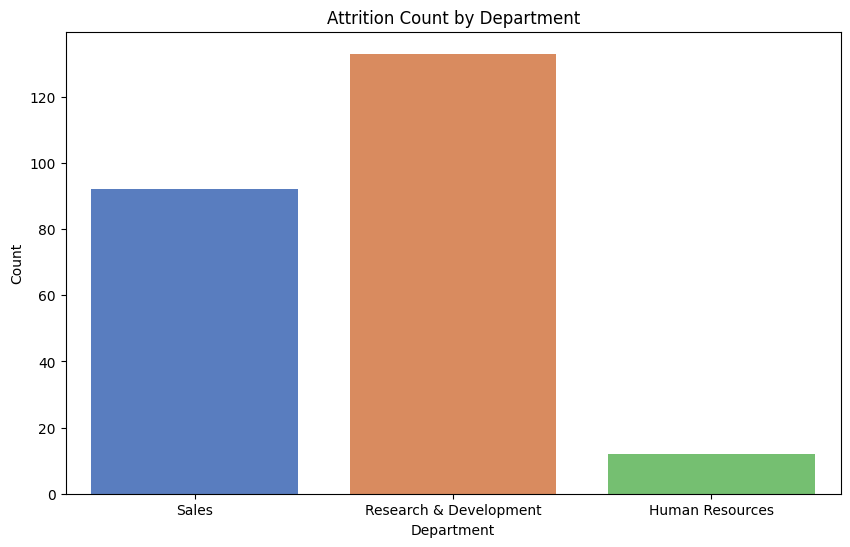

In [145]:
# 4 & 5. Which Department has the Most Attrition? Does Department Impact Attrition?
# Filter the DataFrame for employees with attrition
attrition_data = data[data['Attrition'] == 'Yes']

# Count of attrition per department
attrition_by_department = attrition_data['Department'].value_counts()

# Display the department with the most attrition
most_attritions_department = attrition_by_department.idxmax()
attritions_count = attrition_by_department.max()
print(f"The department with the most attritions is '{most_attritions_department}' with {attritions_count} attritions.")

# Plotting attrition count by department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=attrition_data, palette='muted')
plt.title('Attrition Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

The job role with the most attritions is 'Laboratory Technician' with 62 attritions.


<ipython-input-146-ad093381f87b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobRole', data=attrition_data, palette='muted')


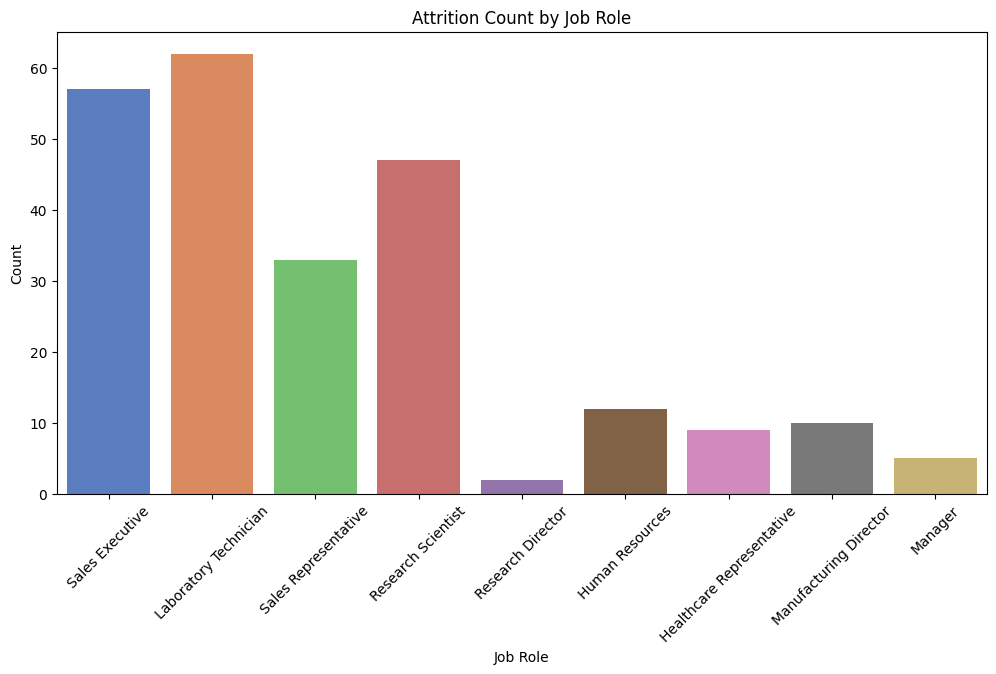

In [146]:
# 6. Which Job Role Has the Most Attrition?
# Count of attrition per job role
attrition_by_job_role = attrition_data['JobRole'].value_counts()

# Display the job role with the most attrition
most_attritions_job_role = attrition_by_job_role.idxmax()
attritions_count = attrition_by_job_role.max()
print(f"The job role with the most attritions is '{most_attritions_job_role}' with {attritions_count} attritions.")

# Plotting attrition by job role
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', data=attrition_data, palette='muted')
plt.title('Attrition Count by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

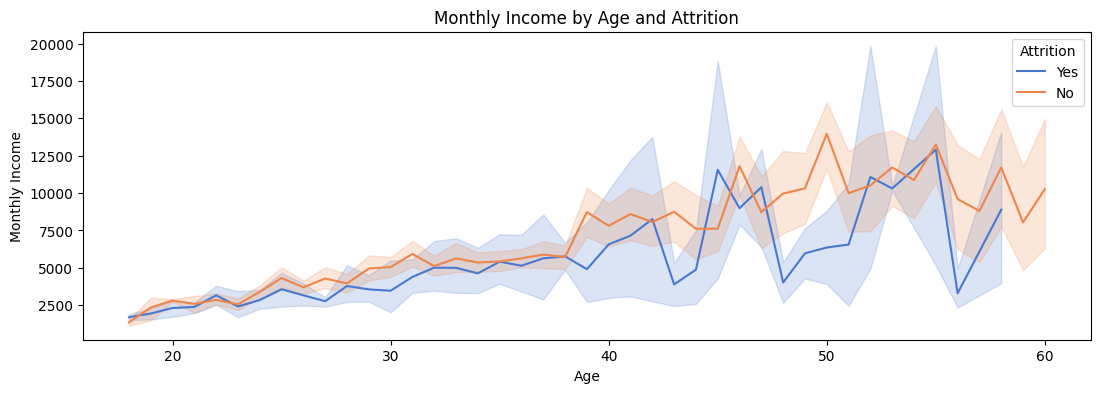

In [147]:
# 7. Effect of Age on Attrition
plt.figure(figsize=(13, 4))
sns.lineplot(data=data, x='Age', y='MonthlyIncome', hue="Attrition", palette='muted')
plt.title('Monthly Income by Age and Attrition')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

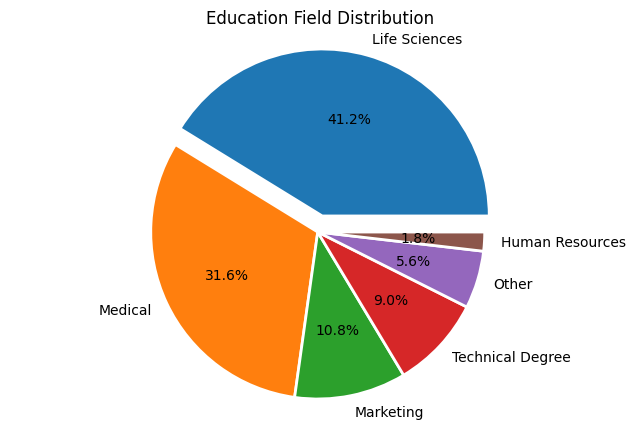

In [148]:
# 10. Which Education Field is More Likely to Leave?
plt.figure(figsize=(8, 5))
explode = (0.1, 0, 0, 0, 0, 0)
labels = ['Life Sciences', "Medical", "Marketing", "Technical Degree", "Other", "Human Resources"]
plt.pie(data['EducationField'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', wedgeprops={"edgecolor": "w", 'linewidth': 2})
plt.axis('equal')
plt.title('Education Field Distribution')
plt.show()

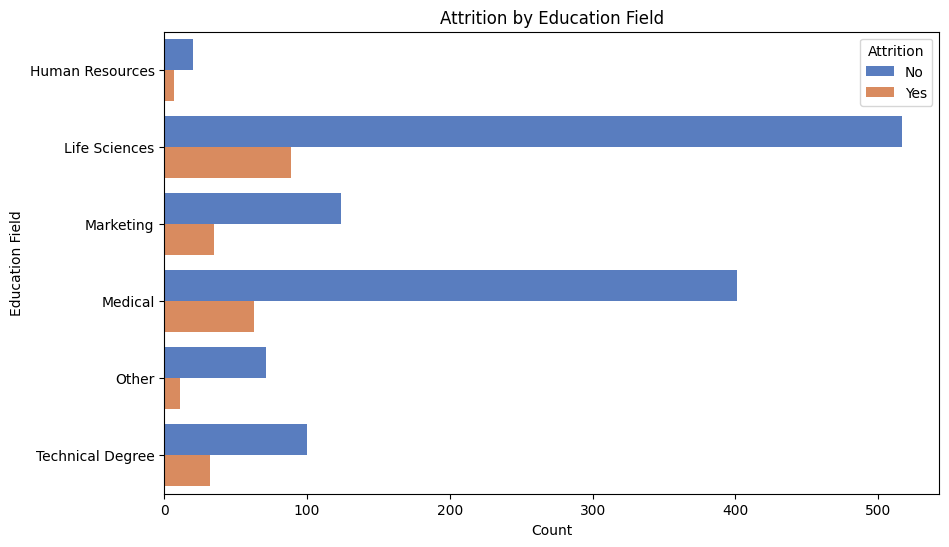

In [149]:
# Barplot for Attrition by Education Field
education_attrition_data = data.groupby(['EducationField', 'Attrition']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=education_attrition_data, x="Count", y="EducationField", hue="Attrition", palette='muted')
plt.title("Attrition by Education Field")
plt.xlabel('Count')
plt.ylabel('Education Field')
plt.show()

# Module 5 - Clustering Algorithms

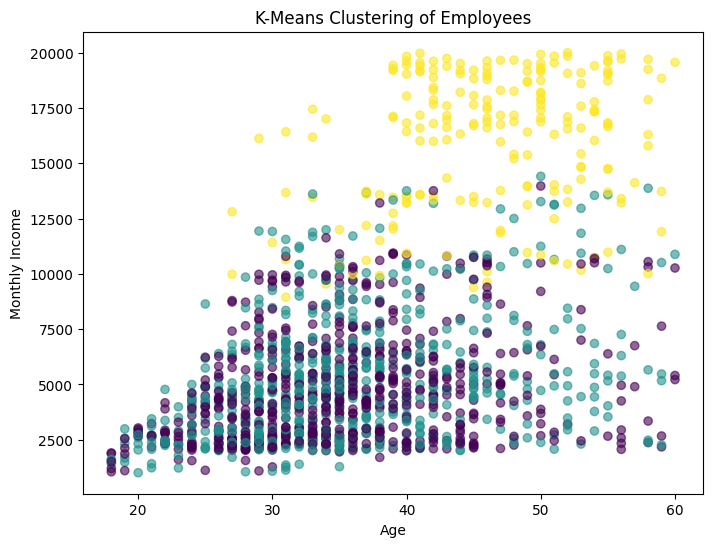

In [133]:
#K-Means Clustering
# Using only numerical features for clustering
numerical_data_for_clustering = data.select_dtypes(include=['int64', 'float64'])
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(numerical_data_for_clustering)

# Adding cluster labels to the dataset
data['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['MonthlyIncome'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('K-Means Clustering of Employees')
plt.show()

In [94]:
silhouette_avg = silhouette_score(numerical_data_for_clustering, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1309194685293329


# Module 6 PCA - Dimensionality Reduction

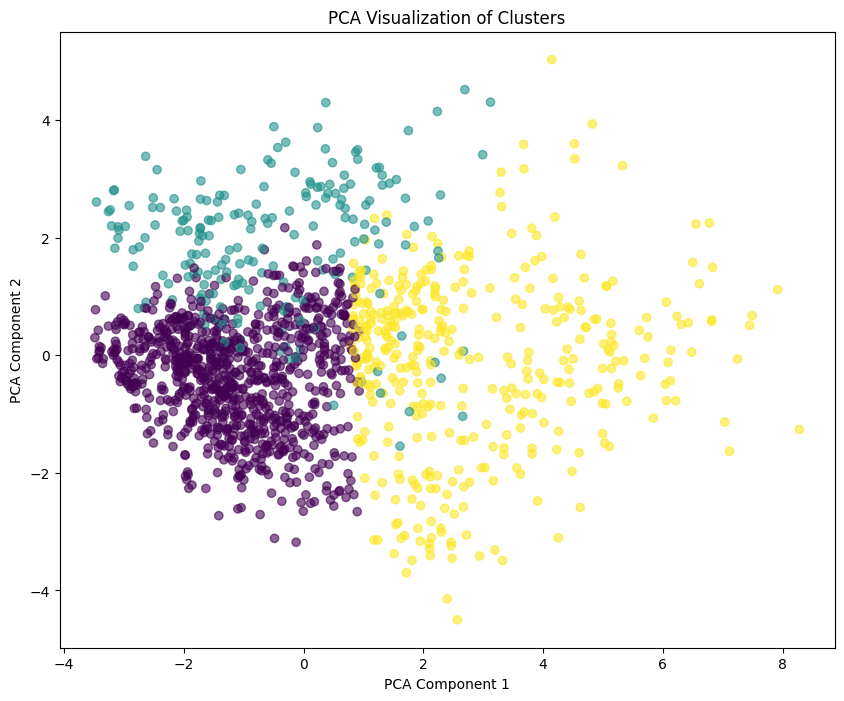

In [95]:
# 11. PCA for Dimensionality Reduction and Visualization
# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
numerical_data_for_pca = numerical_data_for_clustering.drop(columns=categorical_features, errors='ignore')
pca_components = pca.fit_transform(numerical_data_for_pca)# Visualizing the PCA components
plt.figure(figsize=(10, 8))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Clusters')
plt.show()

# Module 7 - Model Development and Evaluation

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Load dataset
file_path = '/content/EDA_Theory_DA/Employee Attrition.csv'
data = pd.read_csv(file_path)

# Removing unnecessary columns
data = data.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18', 'Cluster'], errors='ignore')

# Encoding categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting Data into Training and Test Sets
X = data.drop(columns=['Attrition'])
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

# Initializing Models
log_clf = LogisticRegression(max_iter=500)
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# Evaluating Models
best_model = None
best_accuracy = 0
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(clf.__class__.__name__, "Accuracy:", accuracy)
    if accuracy > best_accuracy:
        best_model = clf
        best_accuracy = accuracy

# Voting Classifier
voting_clf = VotingClassifier([('lgclf', log_clf), ('svc', svc_clf), ('knn', knn_clf), ('dt', dt_clf), ('rf', rf_clf)])
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", voting_accuracy)
if voting_accuracy > best_accuracy:
    best_model = voting_clf
    best_accuracy = voting_accuracy

# AdaBoost Classifier
boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm='SAMME', learning_rate=0.01)
boost.fit(X_train, y_train)
predictions = boost.predict(X_test)
boost_accuracy = accuracy_score(y_test, predictions)
print("AdaBoost Accuracy:", boost_accuracy)
if boost_accuracy > best_accuracy:
    best_model = boost
    best_accuracy = boost_accuracy

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, prediction)
print("XGBoost Accuracy:", xgb_accuracy)
if xgb_accuracy > best_accuracy:
    best_model = xgb
    best_accuracy = xgb_accuracy



Training shape: (1102, 30)
Testing shape: (368, 30)
LogisticRegression Accuracy: 0.8722826086956522
SVC Accuracy: 0.8695652173913043
KNeighborsClassifier Accuracy: 0.8396739130434783
DecisionTreeClassifier Accuracy: 0.8097826086956522
RandomForestClassifier Accuracy: 0.8722826086956522
Voting Classifier Accuracy: 0.875
AdaBoost Accuracy: 0.8722826086956522
XGBoost Accuracy: 0.8831521739130435


In [162]:
print("Best Model:", best_model.__class__.__name__, "with Accuracy:", best_accuracy)

# Sample Input for Prediction
sample_input = X_test.iloc[0:1]
sample_prediction = best_model.predict(sample_input)
print("Sample Input Prediction:", sample_prediction)

Best Model: XGBClassifier with Accuracy: 0.8831521739130435
Sample Input Prediction: [0]
